# Lead Scoring Case Study
#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. When these people fill up a form providing their email address or phone number, they are classified to be a lead.
However, although X Education gets a lot of leads, its lead conversion rate is very poor.The company requires a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around `80%`.

Essentially, the company wants —

-   To help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

## Importing Necessary Libraries

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

#### Codes to show all the rows and columns

In [2]:
pd.set_option("display.max_rows", None) # used to display all the rows
pd.set_option("display.max_colwidth", None) # used to display the entire column's name and the description given in it
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# All the above codes are used to show all the rows and columns with proper column width so that all variables can be 
# read easily and carefully. 

## Step 1: Importing Data

In [3]:
# Importing the Lead Score data
lead= pd.read_csv('Leads.csv') 

In [4]:
# Taking the glance of the dataset,.l;/'p[]'
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Step 2: Data Cleaning

## Inspecting the Dataframe

In [5]:
# Checking the dimension of the dataframe
lead.shape

(9240, 37)

In [6]:
# Looking at the datatype of all the columns present
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observation:
* Data seems to have lots of missing values

In [7]:
# Checking the statistical summary 
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# Checking the unique values present in the dataframe
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Checking for the percentage of the missing values present
round(lead.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observation:
- The above null values are without converting the `Select` value to `null`. So, we need to convert `select` values to       `null` for getting the actual `null` values.

## Missing Data and Outliers Treatment (Data Cleaning)

In [10]:
# Converting SELECT values to Nulls
lead=lead.replace('Select', np.nan)

In [11]:
# Checking again the percentage of the null values
round(lead.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observation:
- We could see columns with >50% null values and hence, it makes no point in imputing these many rows, therefore, dropping   columns with >50% missing values.

In [12]:
# Dropping Lead Profile & How did you hear about X Education columns as they has > 74% nulls
cols=['How did you hear about X Education','Lead Profile']
lead= lead.drop(cols, axis=1)

In [13]:
# Rechecking the shape
lead.shape

(9240, 35)

In [14]:
# Checking for percentage of nulls present
round(lead.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Observation:
- We have missing value columns with even missing value > 50%, So, we will at first hand drop those columns.
- Also, the Id columns are of no use as, no other information can be extracted from them,therefore, dropping them as well.

In [15]:
# Checking for the unique values
lead['Prospect ID'].nunique()

9240

In [16]:
lead_num=lead['Lead Number']
lead_num.nunique()

9240

#### Observation:
- As columns `Prospect ID` and `Lead Number` are the columns representing just the unique ids of the customer and no other   information can be extracted from them, hence, dropping these redundant columns as well.    

In [17]:
# Dropping Prospect ID and Lead Number columns
lead= lead.drop(['Prospect ID','Lead Number'], axis=1)

In [18]:
lead.shape

(9240, 33)

In [19]:
# Dropping Lead Quality column as it has >50% missing value
lead=lead.drop('Lead Quality',1)

In [20]:
lead.shape

(9240, 32)

In [21]:
# Generic function for bar plots
def bar_plot(col):
    values = (lead[col].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = col, ylabel = '% in dataset')

In [22]:
# Checking again for the percentage of nulls
round(lead.isnull().mean()*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Visvualizing Asymmetrique columns (since they have >45% missing nulls)

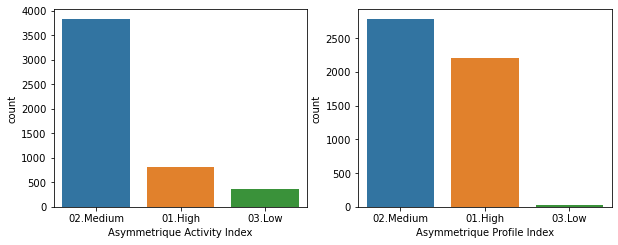

In [23]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot(lead['Asymmetrique Activity Index'])

plt.subplot(2,2,2)
sns.countplot(lead['Asymmetrique Profile Index'])
plt.show()

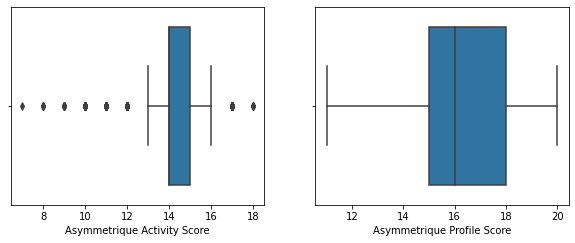

In [24]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(lead['Asymmetrique Activity Score'])

plt.subplot(2,2,2)
sns.boxplot(lead['Asymmetrique Profile Score'])
plt.show()

In [25]:
aym=['Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index']

In [26]:
lead[aym].describe()

Asymmetrique Activity Score  Asymmetrique Profile Score
count                  5022.000000                 5022.000000
mean                     14.306252                   16.344883
std                       1.386694                    1.811395
min                       7.000000                   11.000000
25%                      14.000000                   15.000000
50%                      14.000000                   16.000000
75%                      15.000000                   18.000000
max                      18.000000                   20.000000

#### Observation:
- These `Asymmetrique` columns which has > 45% missing values shows high variations, which could be seen from the graphs     above. Also, it is not worthy to impute these columns with either of the mean/median as they don't seem to be               significant. So,it is better to drop these columns.

In [27]:
# Updating dataset with the change
lead = lead.drop(aym, axis=1)

In [28]:
lead.shape

(9240, 28)

In [29]:
round(lead.isnull().mean()*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Imputing missing values in columns having nulls <40%

In [30]:
lead['City'].nunique() # It is a categorical column 

6

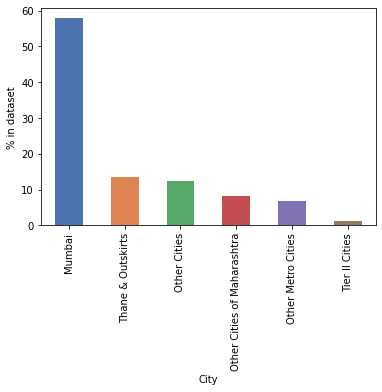

In [31]:
# Using the bar plot for categorical column
bar_plot('City')

#### Observation:
- `City` being a categorical column and `Mumbai` has the highest frequency, therefore, filling the missing values with        `Mumbai`.

In [32]:
# Imputing null values with the mode value 'Mumbai'
lead['City']=lead['City'].replace(np.nan, 'Mumbai')

In [33]:
# Checking for nulls if any
lead['City'].isnull().sum()

0

In [34]:
# Checking Tags column
lead['Tags'].nunique()

26

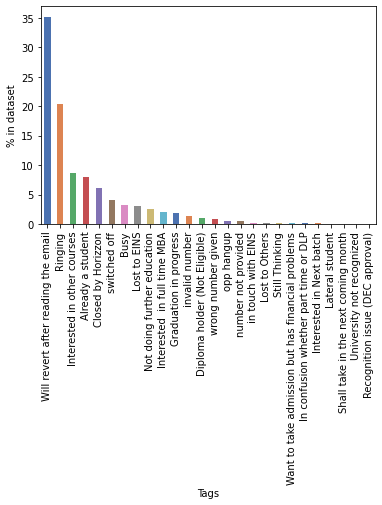

In [35]:
bar_plot('Tags')

#### Observation:
- As seen from the graph `Will revert after reading the email` has the highest frequency therefore imputing the nulls with   this value.

In [36]:
# Imputing null values with the mode value 'Will revert after reading the email'
lead['Tags']=lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [37]:
# Checking for nulls if any
lead['Tags'].isnull().sum()

0

In [38]:
# Checking for 'Specialization' column
lead['Specialization'].nunique() # it is a categorical column therefore, will also be imputed with a mode value

18

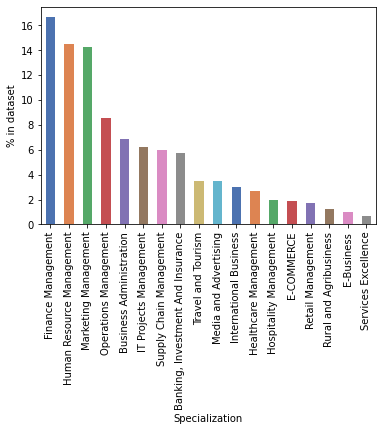

In [39]:
# Visualizing the Specialization column
bar_plot('Specialization')

In [40]:
# Imputing missing values with the mode value 'Finance Management'
lead['Specialization']=lead['Specialization'].replace(np.nan, 'Finance Management')

In [41]:
# Checking for nulls if any
lead['Specialization'].isnull().sum()

0

In [42]:
# listing out remaining 3 major categorical columns with missing values
lst=['Country','What is your current occupation','What matters most to you in choosing a course']

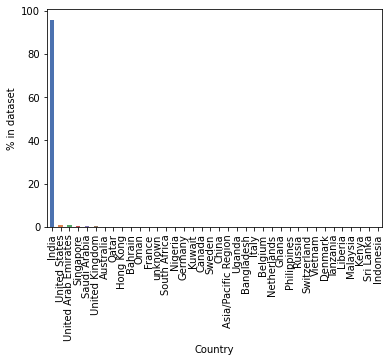

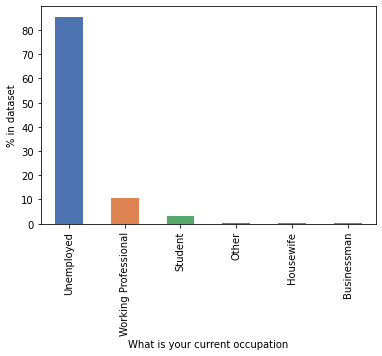

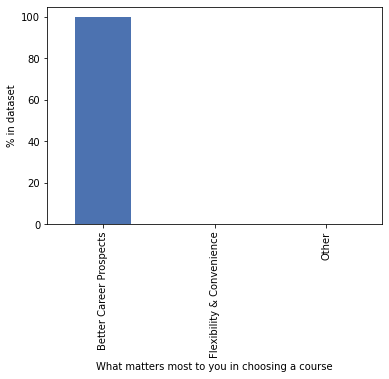

In [43]:
# Plotting them via loop
for var in lst:
    bar_plot(var)
    plt.show()

In [44]:
# Imputing the above categorical values with the mode values
for col in lst:
    high=lead[col].describe()['top']
    lead[col]=lead[col].replace(np.nan, high)

In [45]:
# Checking for null value if any
for col in lst:
    print(lead[col].isnull().sum())

0
0
0


In [46]:
# Checking for the unique values in the following columns
lst=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity']
for col in lst:
    print(lead[col].nunique())

21
41
114
17


In [47]:
# Checking the percentage of missing values in the below columns 
for col in lst:
    print(round(lead[col].isnull().mean()*100,2))

0.39
1.48
1.48
1.11


<AxesSubplot:xlabel='Page Views Per Visit'>

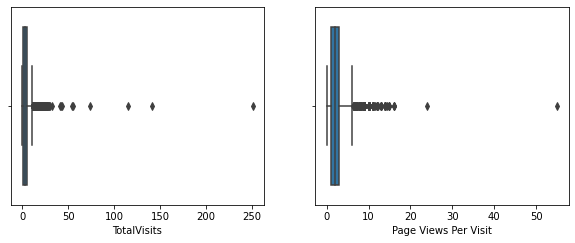

In [48]:
# Checking the box plots
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(lead['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(lead['Page Views Per Visit'])

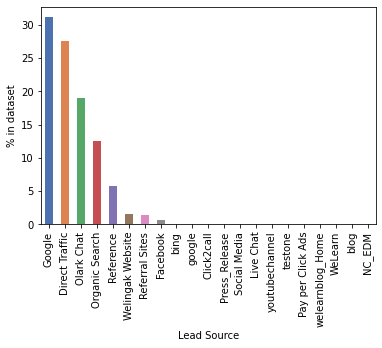

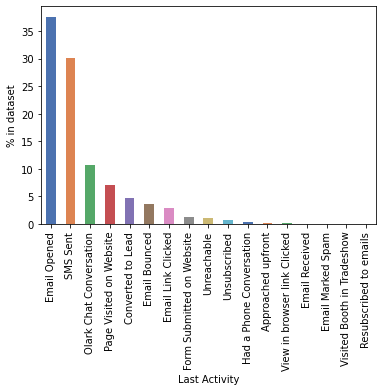

In [49]:
# Checking the bar plots of the following
lst=['Lead Source','Last Activity']
for col in lst:
    bar_plot(col)
    plt.show()

#### Observation:
- The missing values in the above columns are less than 2%, so, the rows with missing information can be dropped.

In [50]:
# Dropping the missing values from the above columns with <2% of missing data
lead.dropna(inplace=True)

In [51]:
# Checking for the nulls if any
round(lead.isnull().mean()*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### Observation:
- Now there is no more missing values in the data. Checking for the outliers if any.

In [52]:
# Chekcing the continuous columns
lead.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

#### Observation:
- There are 3 numerical columns and they seems to have huge outliers in them

AxesSubplot(0.125,0.125;0.775x0.755)


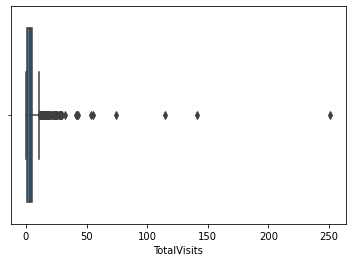

AxesSubplot(0.125,0.125;0.775x0.755)


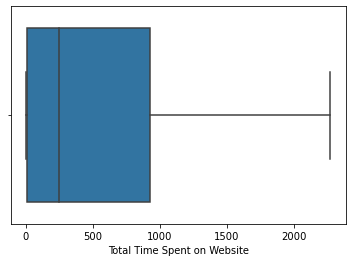

AxesSubplot(0.125,0.125;0.775x0.755)


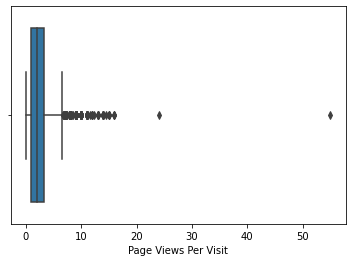

In [53]:
# Boxplots for numerical columns
num=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for col in num:
    print(sns.boxplot(lead[col]))
    plt.show()

In [54]:
# Looking the data at different percentiles
lead[num].describe([0.05,.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
5%        0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

#### Observation:
From the boxplots, we can see that there are outliers present in the variables.

* For `TotalVisits`, the 95% quantile is 110 whereas the maximum value is 251. But capping at 99% leaves the data with many   outliers. Hence, we should cap these outliers at 95% value.
* There are no significant outliers in `Total Time Spent on Website`
* For `Page Views Per Visit`, the 99% quantile is 9 whereas the maximum value is 55 which is quiet similar to  `TotalVisits`. But capping at 99% leaves the data with many outliers therfore, we should be capping outliers at 95% value.

In [55]:
# Outlier treatment
percentile =lead['TotalVisits'].quantile([0.95]).values
lead['TotalVisits'][lead['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = lead['Page Views Per Visit'].quantile([0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentile[0]] = percentile[0]

AxesSubplot(0.125,0.125;0.775x0.755)


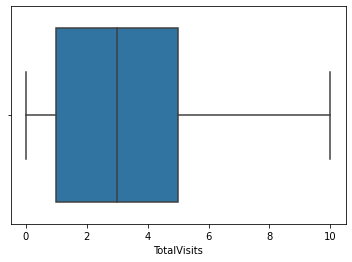

AxesSubplot(0.125,0.125;0.775x0.755)


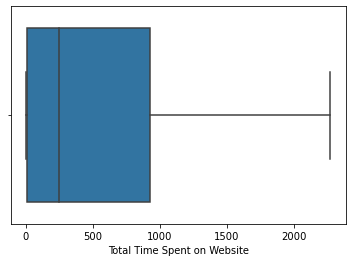

AxesSubplot(0.125,0.125;0.775x0.755)


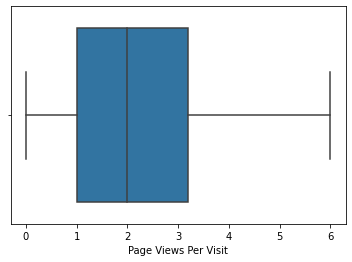

In [56]:
# Rechecking the Boxplots for numerical columns
num=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for col in num:
    print(sns.boxplot(lead[col]))
    plt.show()

#### Observation:
Outliers have been taken care of. The data is clean now.

## Step 3: EDA and Data Visualization

In [57]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [58]:
# Categorising all the columns into different categories
cont_cols=list(lead.columns[lead.dtypes != 'object'])
cat_cols=list(lead.columns[lead.dtypes == 'object'])
target=lead["Converted"]
len(cont_cols)+len(cat_cols)

28

In [59]:
# List of continuous columns
cat_cols=list(lead.columns[lead.dtypes == 'object'])
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## Univaraite Analysis

Converted


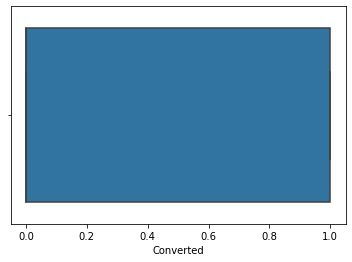

TotalVisits


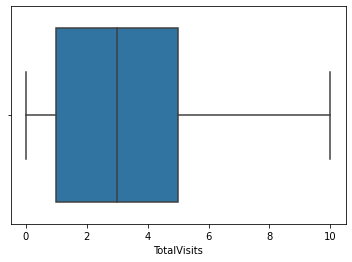

Total Time Spent on Website


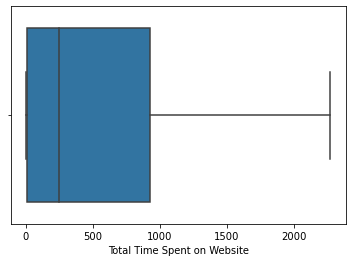

Page Views Per Visit


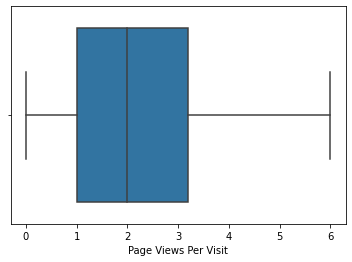

In [60]:
# Created a loop for analysis
for i in cont_cols:
    print(i)
    sns.boxplot(lead[i])
    plt.show()

Converted


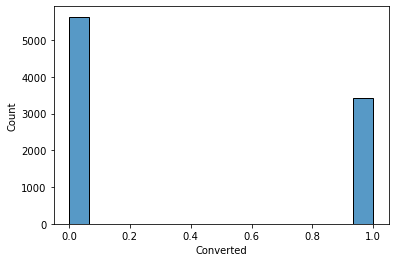

TotalVisits


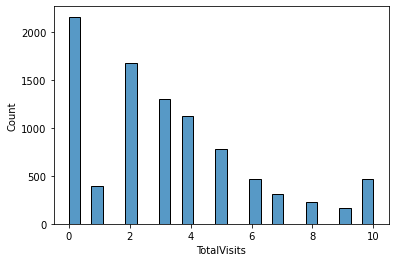

Total Time Spent on Website


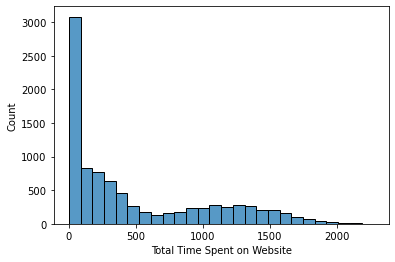

Page Views Per Visit


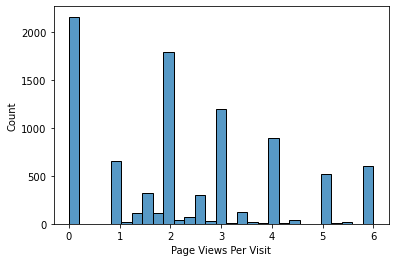

In [61]:
# Created a loop for analysis
for i in cont_cols:
    print(i)
    sns.histplot(lead[i])
    plt.show()

Lead Origin


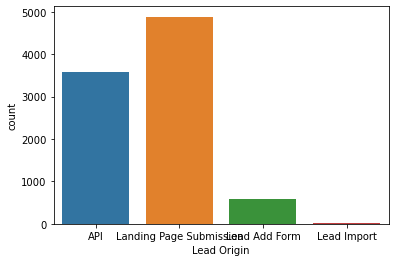

Lead Source


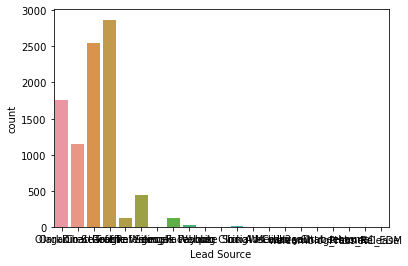

Do Not Email


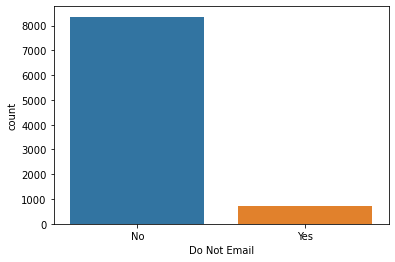

Do Not Call


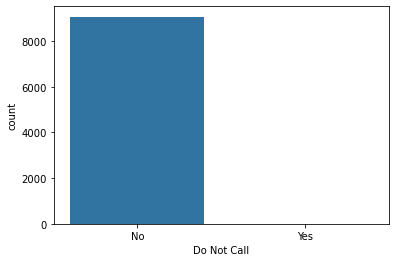

Last Activity


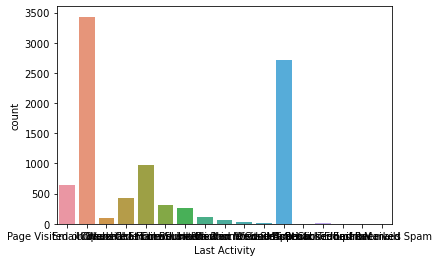

Country


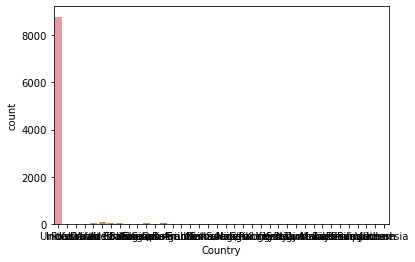

Specialization


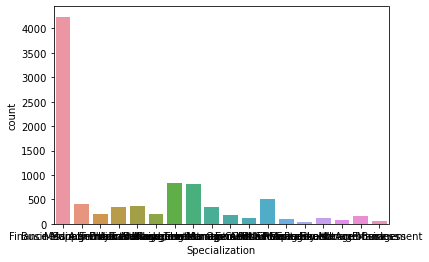

What is your current occupation


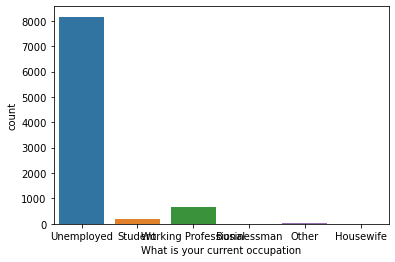

What matters most to you in choosing a course


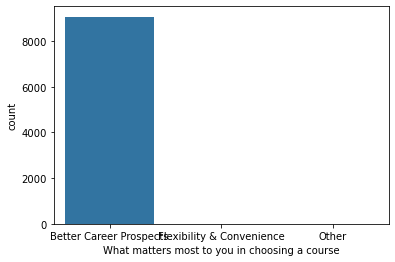

Search


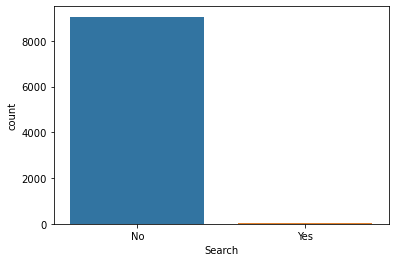

Magazine


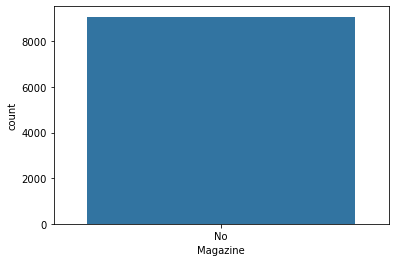

Newspaper Article


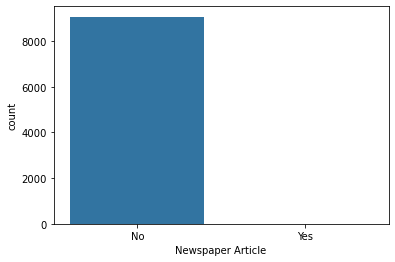

X Education Forums


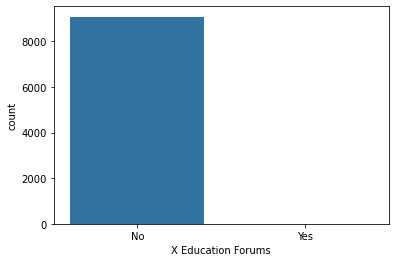

Newspaper


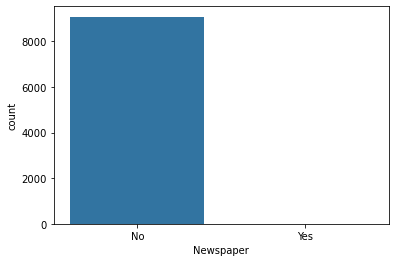

Digital Advertisement


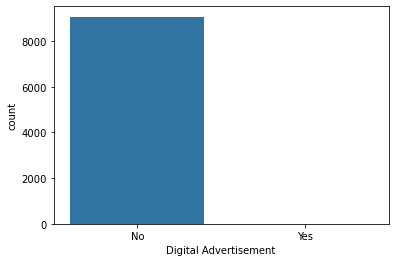

Through Recommendations


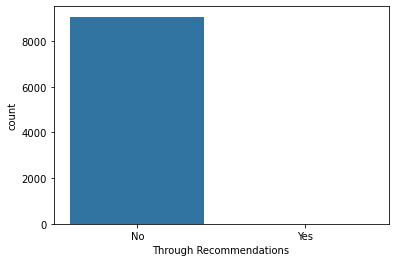

Receive More Updates About Our Courses


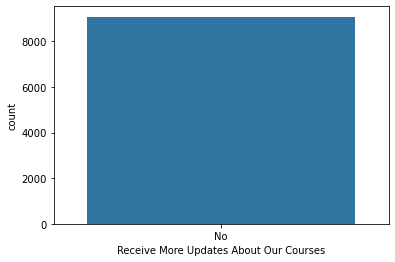

Tags


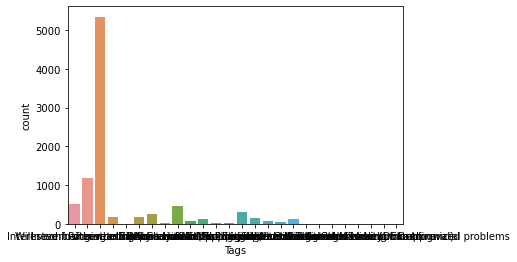

Update me on Supply Chain Content


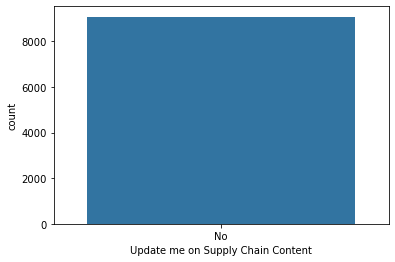

Get updates on DM Content


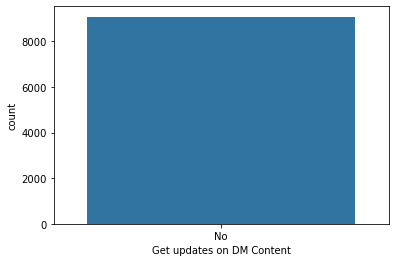

City


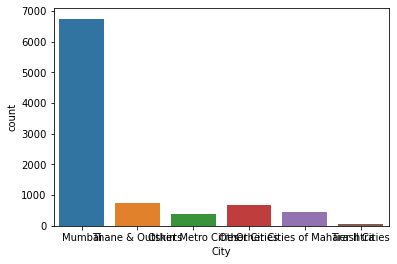

I agree to pay the amount through cheque


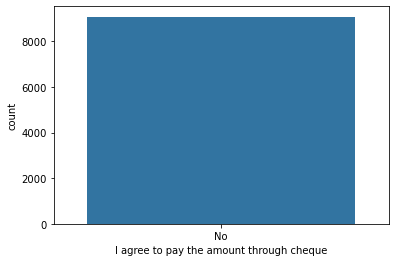

A free copy of Mastering The Interview


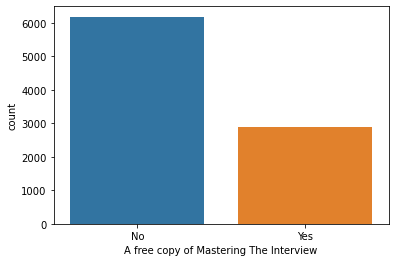

Last Notable Activity


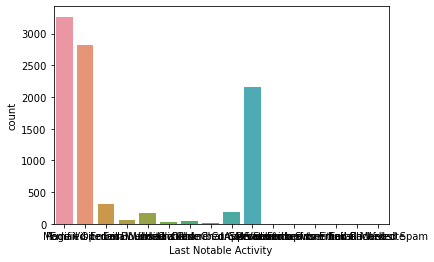

In [62]:
# Analysing categorical columns
for i in cat_cols:
    print(i)
    sns.countplot(lead[i])
    plt.show()

## Bivariate Analysis

Boxplot Converted Vs Lead Origin


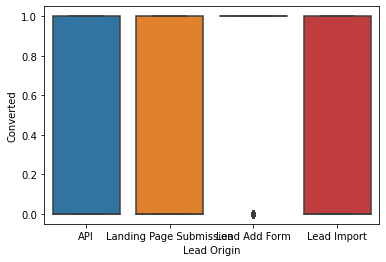

Boxplot Converted Vs Lead Source


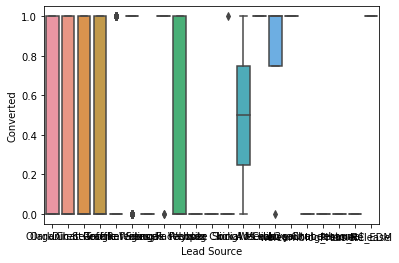

Boxplot Converted Vs Do Not Email


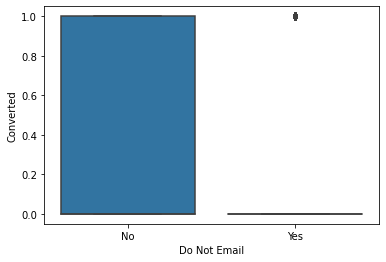

Boxplot Converted Vs Do Not Call


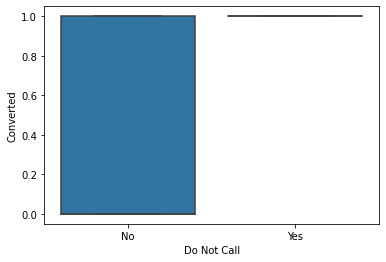

Boxplot Converted Vs Last Activity


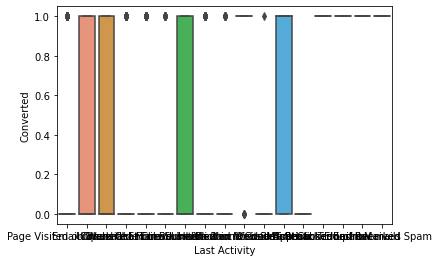

Boxplot Converted Vs Country


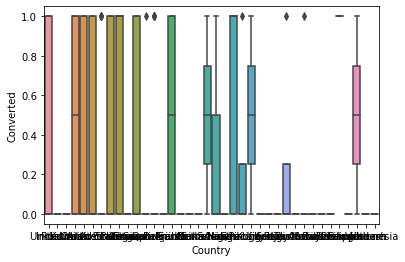

Boxplot Converted Vs Specialization


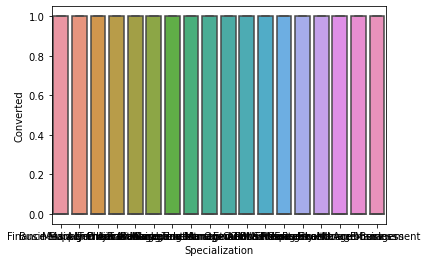

Boxplot Converted Vs What is your current occupation


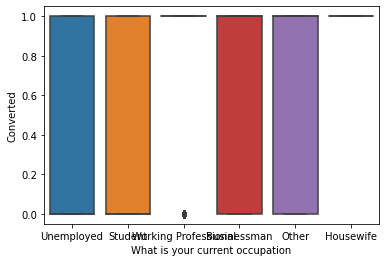

Boxplot Converted Vs What matters most to you in choosing a course


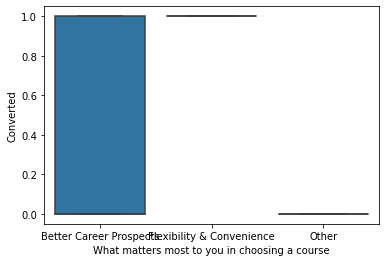

Boxplot Converted Vs Search


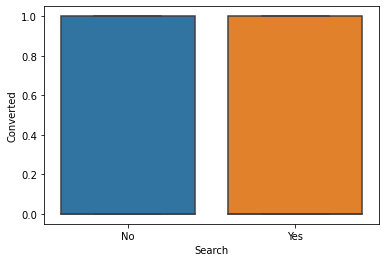

Boxplot Converted Vs Magazine


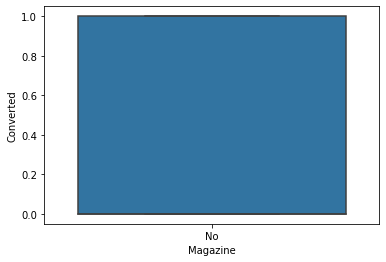

Boxplot Converted Vs Newspaper Article


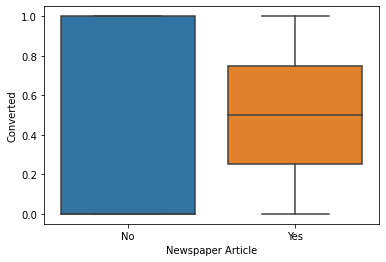

Boxplot Converted Vs X Education Forums


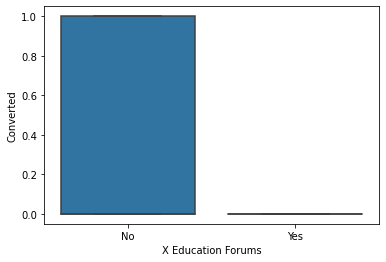

Boxplot Converted Vs Newspaper


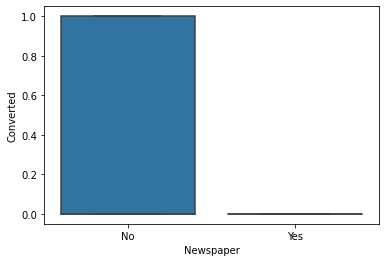

Boxplot Converted Vs Digital Advertisement


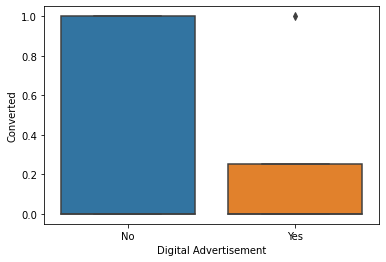

Boxplot Converted Vs Through Recommendations


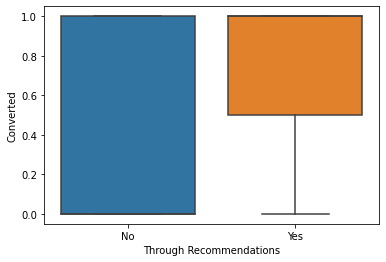

Boxplot Converted Vs Receive More Updates About Our Courses


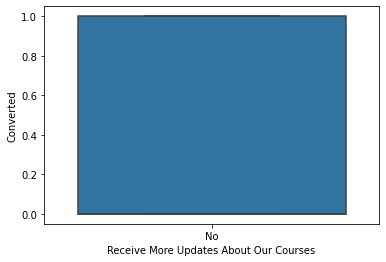

Boxplot Converted Vs Tags


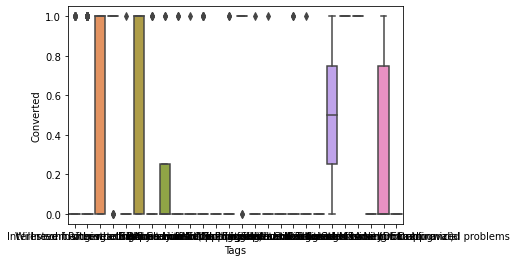

Boxplot Converted Vs Update me on Supply Chain Content


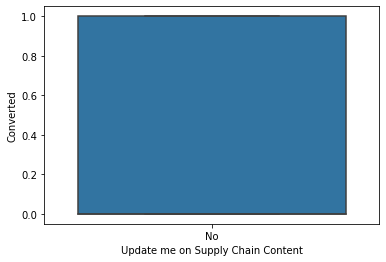

Boxplot Converted Vs Get updates on DM Content


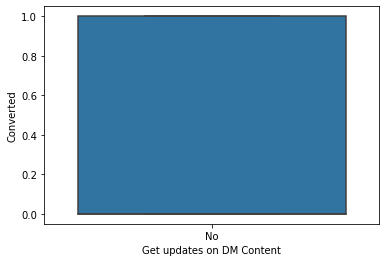

Boxplot Converted Vs City


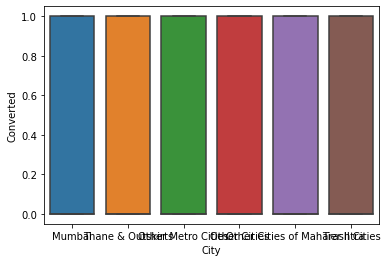

Boxplot Converted Vs I agree to pay the amount through cheque


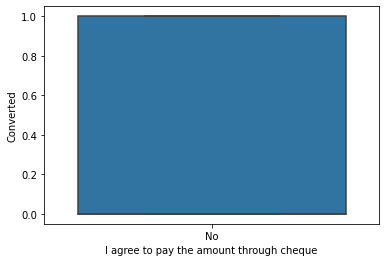

Boxplot Converted Vs A free copy of Mastering The Interview


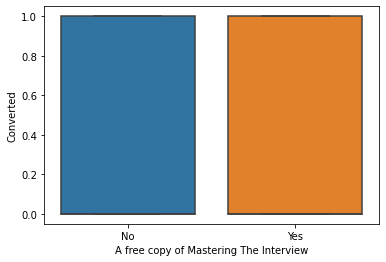

Boxplot Converted Vs Last Notable Activity


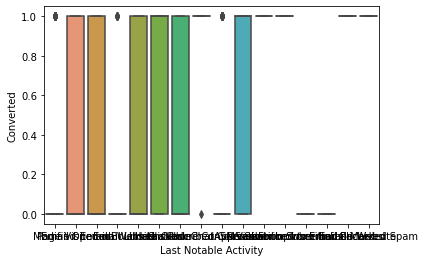

Boxplot TotalVisits Vs Lead Origin


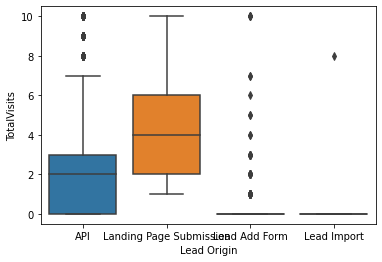

Boxplot TotalVisits Vs Lead Source


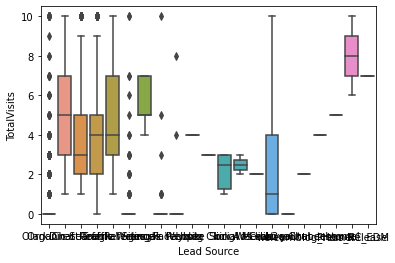

Boxplot TotalVisits Vs Do Not Email


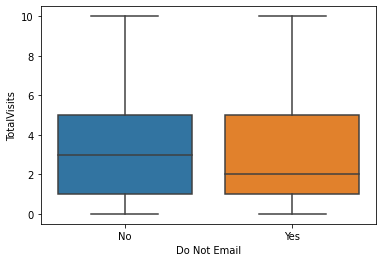

Boxplot TotalVisits Vs Do Not Call


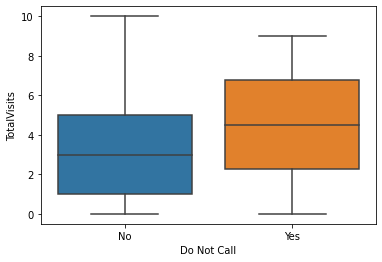

Boxplot TotalVisits Vs Last Activity


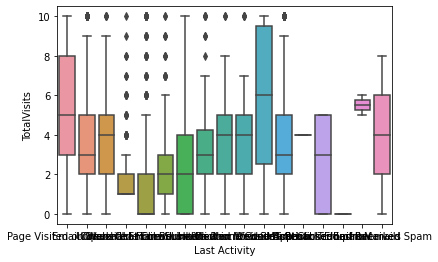

Boxplot TotalVisits Vs Country


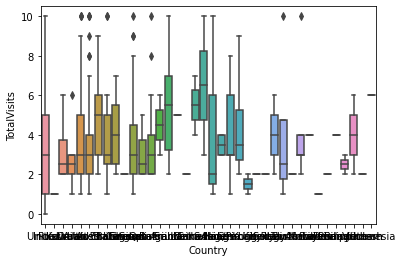

Boxplot TotalVisits Vs Specialization


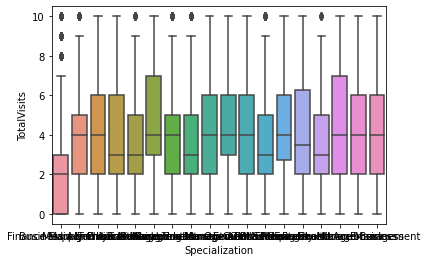

Boxplot TotalVisits Vs What is your current occupation


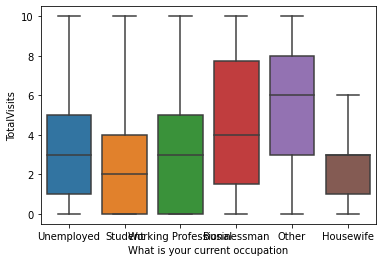

Boxplot TotalVisits Vs What matters most to you in choosing a course


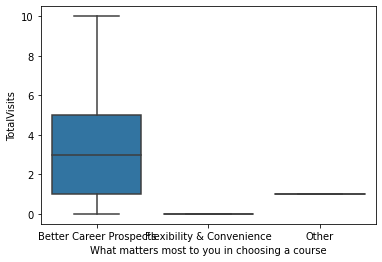

Boxplot TotalVisits Vs Search


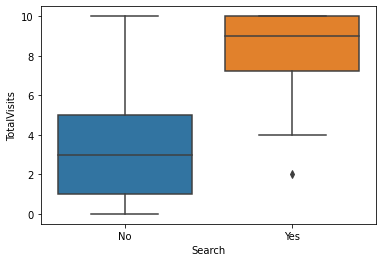

Boxplot TotalVisits Vs Magazine


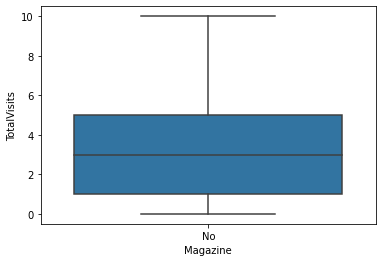

Boxplot TotalVisits Vs Newspaper Article


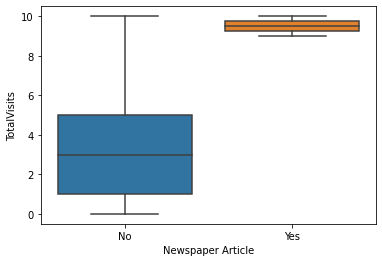

Boxplot TotalVisits Vs X Education Forums


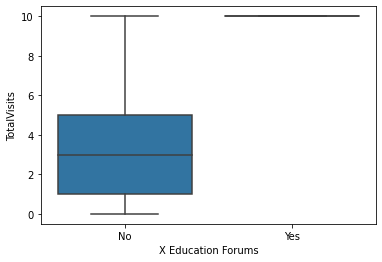

Boxplot TotalVisits Vs Newspaper


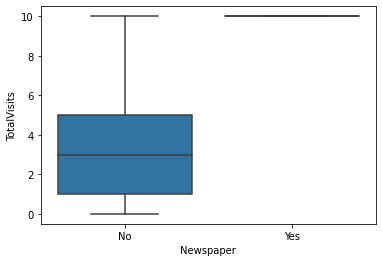

Boxplot TotalVisits Vs Digital Advertisement


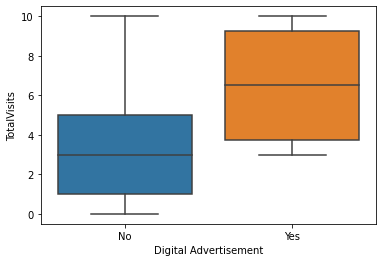

Boxplot TotalVisits Vs Through Recommendations


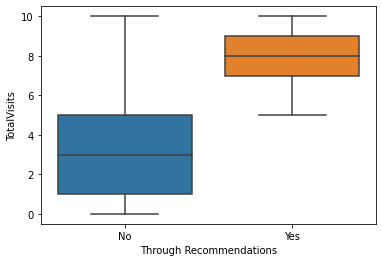

Boxplot TotalVisits Vs Receive More Updates About Our Courses


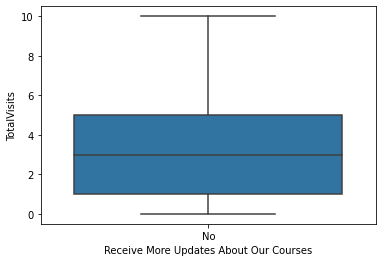

Boxplot TotalVisits Vs Tags


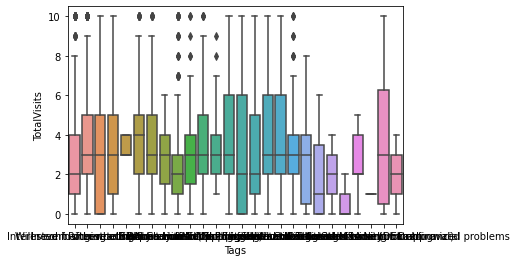

Boxplot TotalVisits Vs Update me on Supply Chain Content


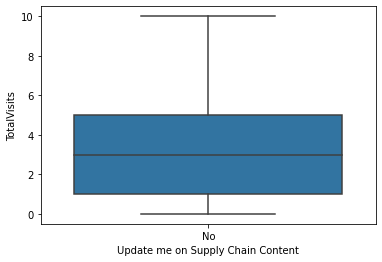

Boxplot TotalVisits Vs Get updates on DM Content


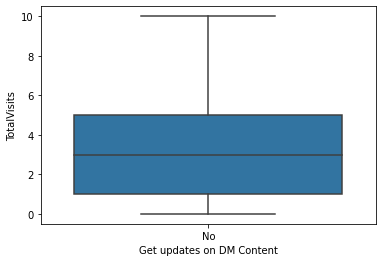

Boxplot TotalVisits Vs City


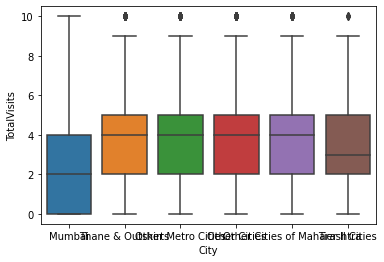

Boxplot TotalVisits Vs I agree to pay the amount through cheque


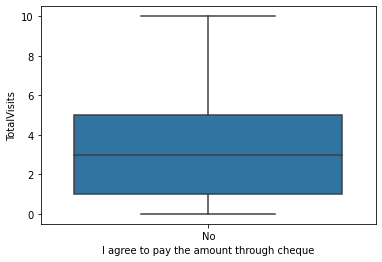

Boxplot TotalVisits Vs A free copy of Mastering The Interview


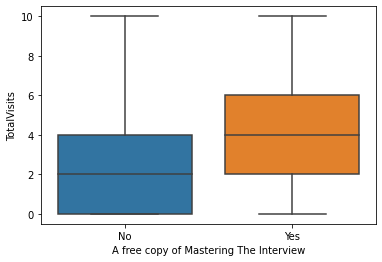

Boxplot TotalVisits Vs Last Notable Activity


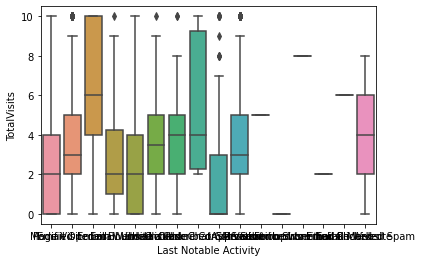

Boxplot Total Time Spent on Website Vs Lead Origin


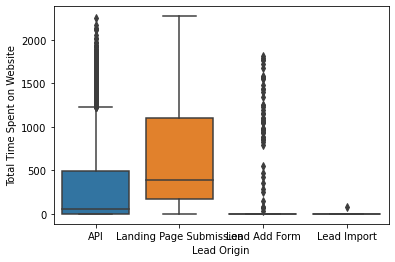

Boxplot Total Time Spent on Website Vs Lead Source


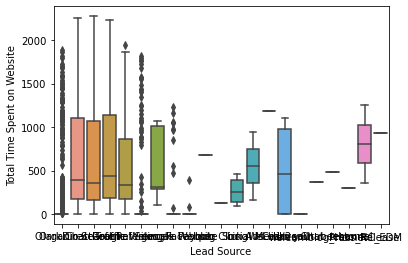

Boxplot Total Time Spent on Website Vs Do Not Email


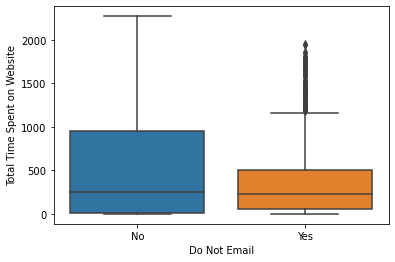

Boxplot Total Time Spent on Website Vs Do Not Call


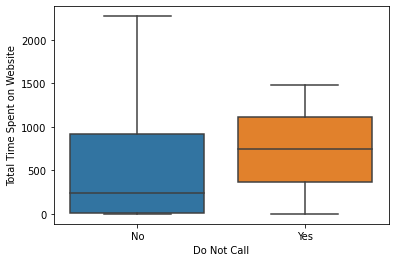

Boxplot Total Time Spent on Website Vs Last Activity


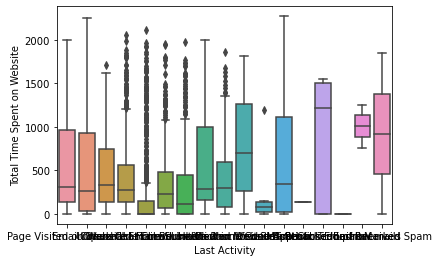

Boxplot Total Time Spent on Website Vs Country


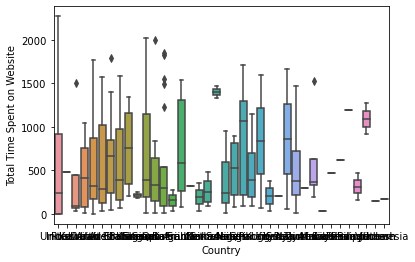

Boxplot Total Time Spent on Website Vs Specialization


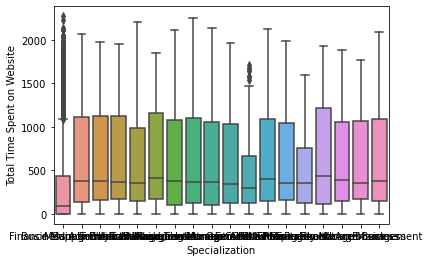

Boxplot Total Time Spent on Website Vs What is your current occupation


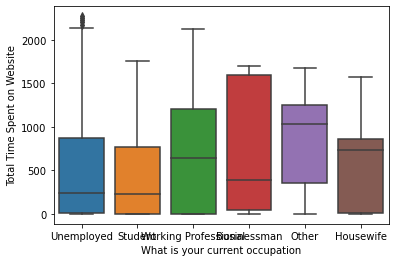

Boxplot Total Time Spent on Website Vs What matters most to you in choosing a course


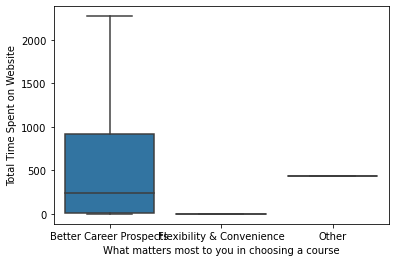

Boxplot Total Time Spent on Website Vs Search


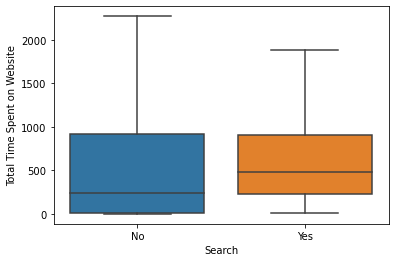

Boxplot Total Time Spent on Website Vs Magazine


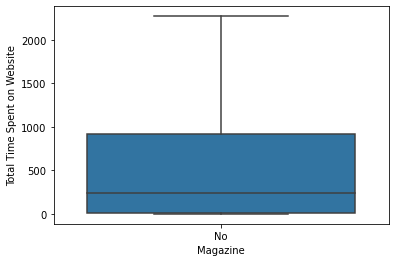

Boxplot Total Time Spent on Website Vs Newspaper Article


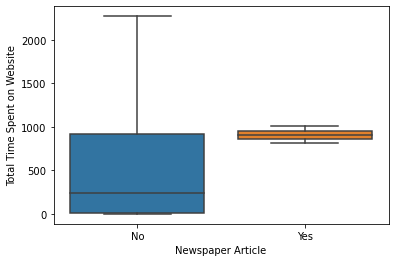

Boxplot Total Time Spent on Website Vs X Education Forums


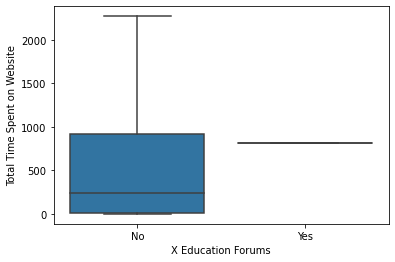

Boxplot Total Time Spent on Website Vs Newspaper


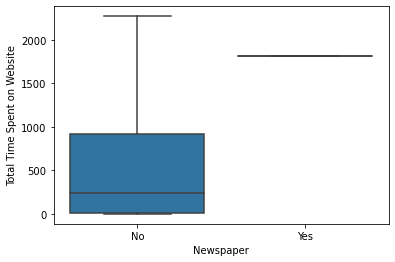

Boxplot Total Time Spent on Website Vs Digital Advertisement


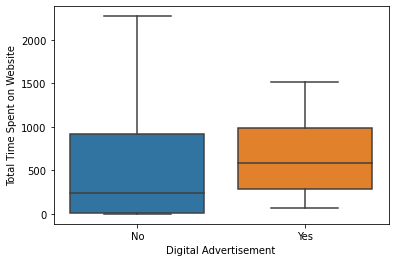

Boxplot Total Time Spent on Website Vs Through Recommendations


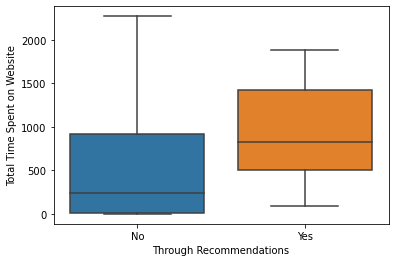

Boxplot Total Time Spent on Website Vs Receive More Updates About Our Courses


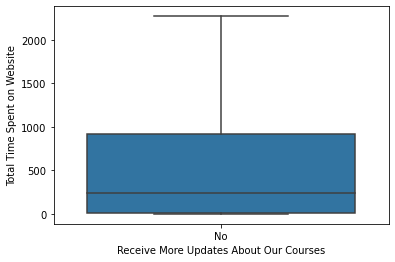

Boxplot Total Time Spent on Website Vs Tags


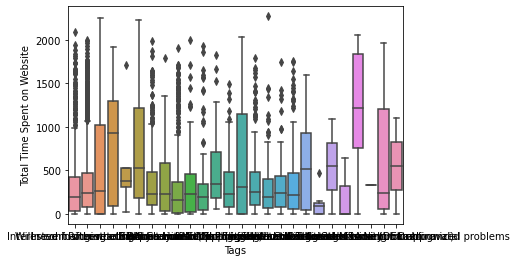

Boxplot Total Time Spent on Website Vs Update me on Supply Chain Content


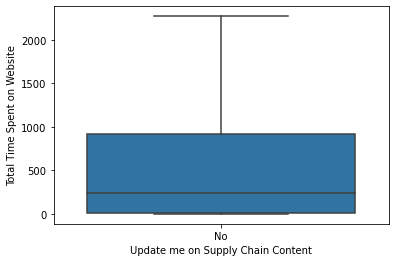

Boxplot Total Time Spent on Website Vs Get updates on DM Content


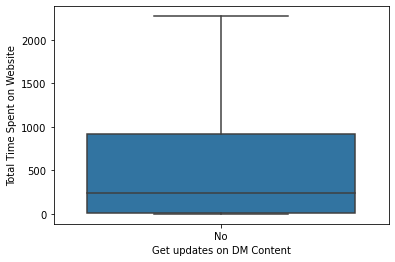

Boxplot Total Time Spent on Website Vs City


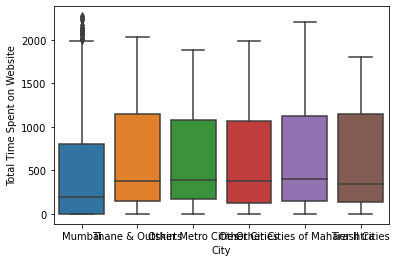

Boxplot Total Time Spent on Website Vs I agree to pay the amount through cheque


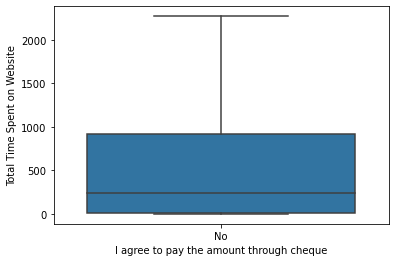

Boxplot Total Time Spent on Website Vs A free copy of Mastering The Interview


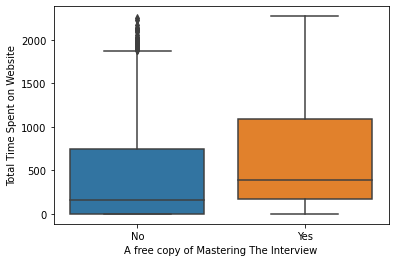

Boxplot Total Time Spent on Website Vs Last Notable Activity


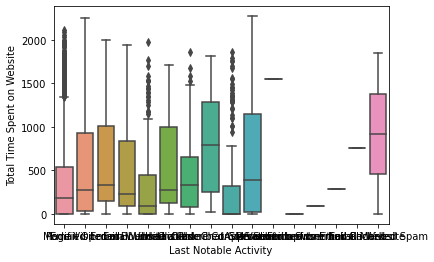

Boxplot Page Views Per Visit Vs Lead Origin


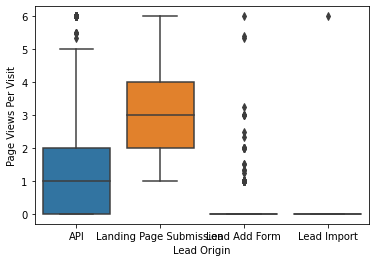

Boxplot Page Views Per Visit Vs Lead Source


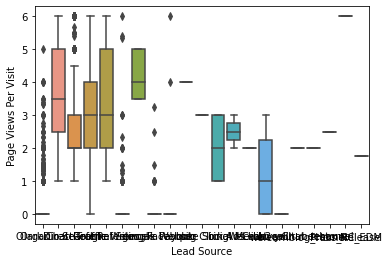

Boxplot Page Views Per Visit Vs Do Not Email


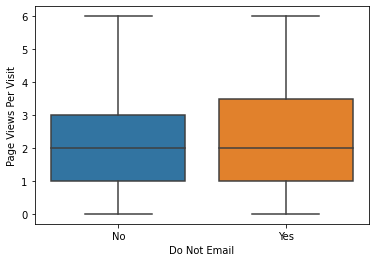

Boxplot Page Views Per Visit Vs Do Not Call


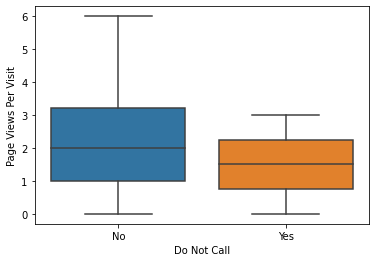

Boxplot Page Views Per Visit Vs Last Activity


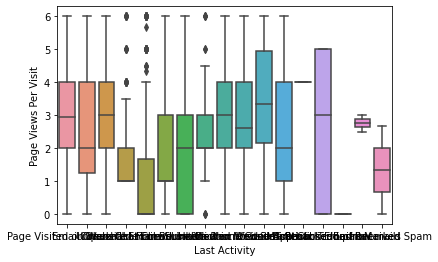

Boxplot Page Views Per Visit Vs Country


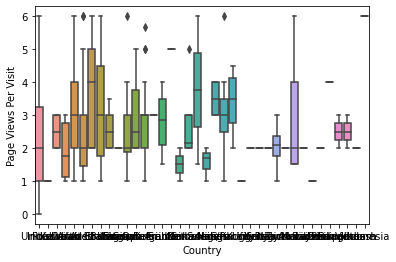

Boxplot Page Views Per Visit Vs Specialization


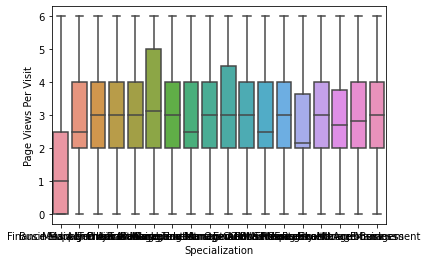

Boxplot Page Views Per Visit Vs What is your current occupation


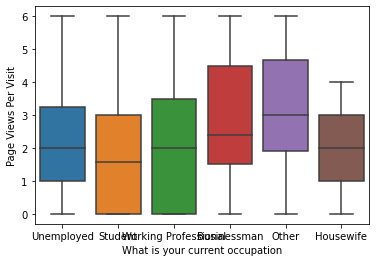

Boxplot Page Views Per Visit Vs What matters most to you in choosing a course


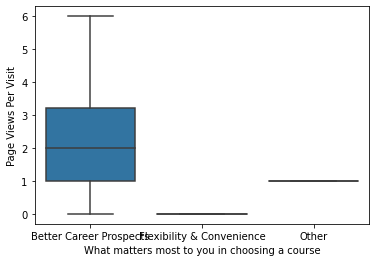

Boxplot Page Views Per Visit Vs Search


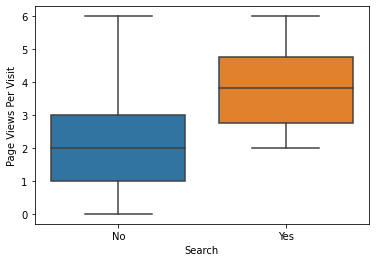

Boxplot Page Views Per Visit Vs Magazine


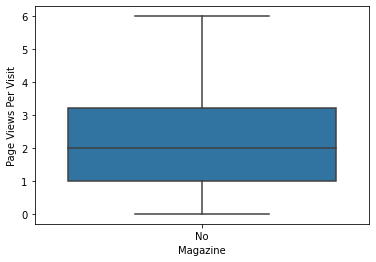

Boxplot Page Views Per Visit Vs Newspaper Article


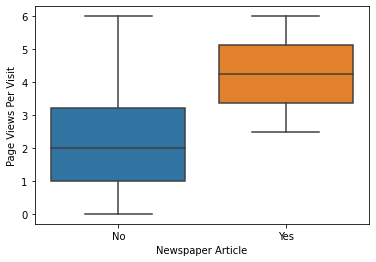

Boxplot Page Views Per Visit Vs X Education Forums


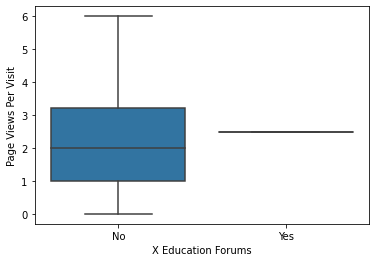

Boxplot Page Views Per Visit Vs Newspaper


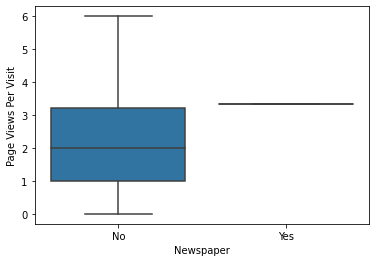

Boxplot Page Views Per Visit Vs Digital Advertisement


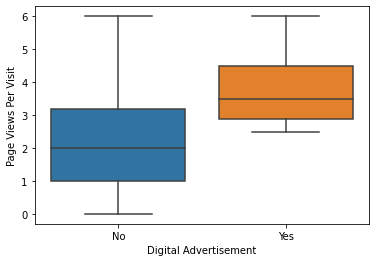

Boxplot Page Views Per Visit Vs Through Recommendations


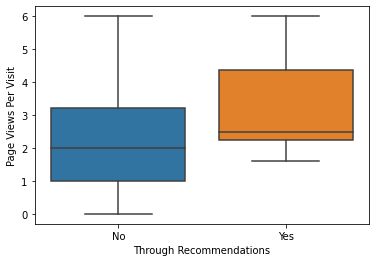

Boxplot Page Views Per Visit Vs Receive More Updates About Our Courses


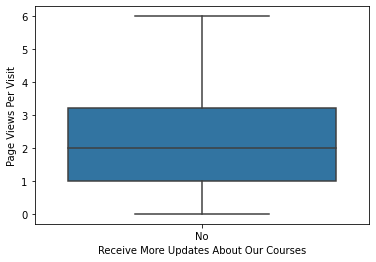

Boxplot Page Views Per Visit Vs Tags


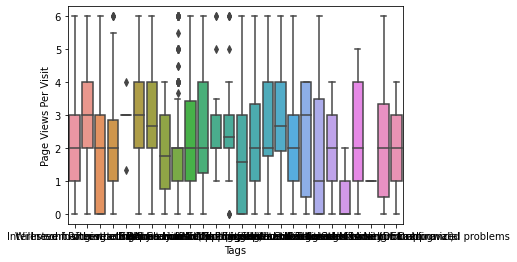

Boxplot Page Views Per Visit Vs Update me on Supply Chain Content


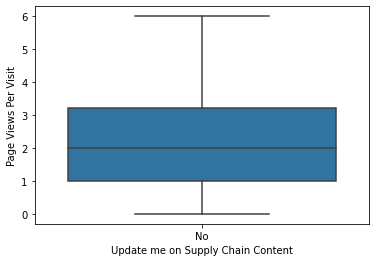

Boxplot Page Views Per Visit Vs Get updates on DM Content


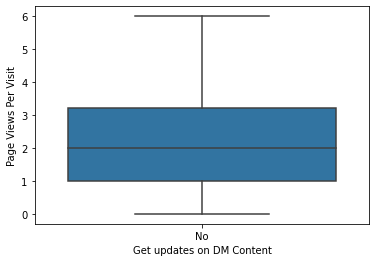

Boxplot Page Views Per Visit Vs City


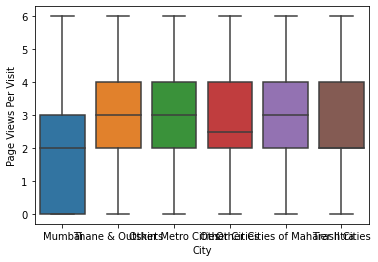

Boxplot Page Views Per Visit Vs I agree to pay the amount through cheque


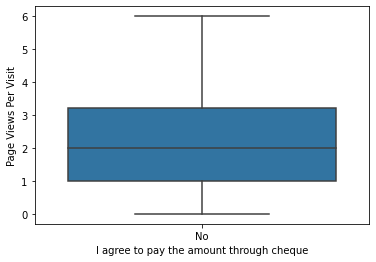

Boxplot Page Views Per Visit Vs A free copy of Mastering The Interview


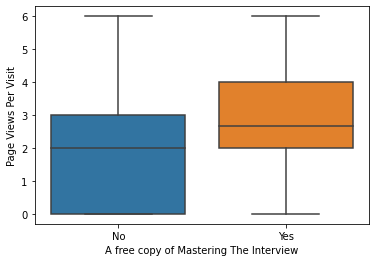

Boxplot Page Views Per Visit Vs Last Notable Activity


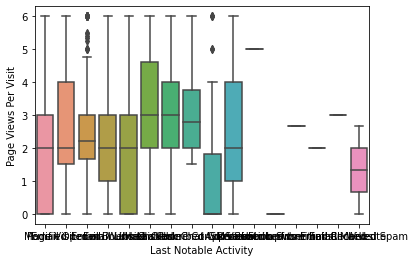

In [63]:
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot",i,"Vs",j)
        sns.boxplot(lead[j],lead[i])
        plt.show()

#### Observation:
* We could see many of the continuous columns have just the single value, so we won't be able to gather any kind of           information from them. So, it is better to drop them.

In [64]:
# Columns having just the single value in them
single_value_cols=lead.columns[lead.nunique()==1]
single_value_cols

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [65]:
# Dropping columns having just the single value
lead=lead.drop(single_value_cols,1)

In [66]:
lead.shape

(9074, 23)

ScatterPlot Converted Vs TotalVisits


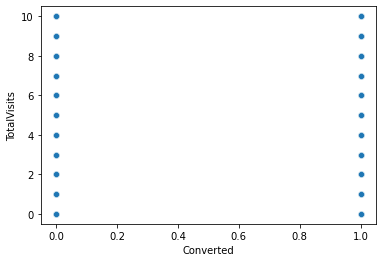

ScatterPlot Converted Vs Total Time Spent on Website


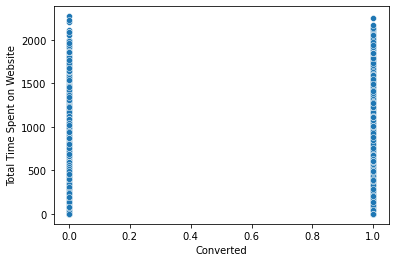

ScatterPlot Converted Vs Page Views Per Visit


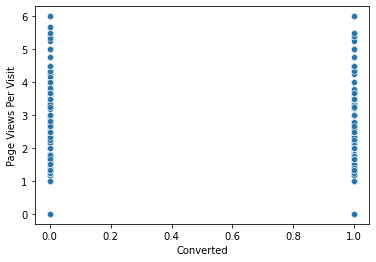

ScatterPlot TotalVisits Vs Converted


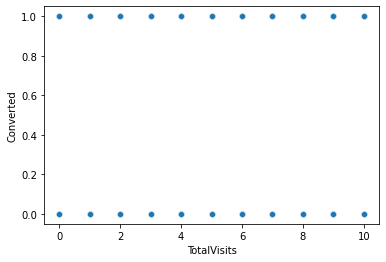

ScatterPlot TotalVisits Vs Total Time Spent on Website


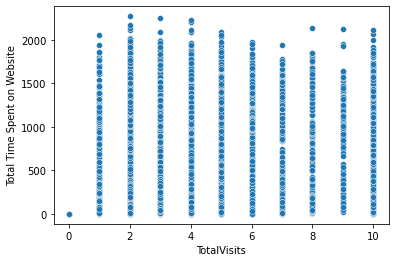

ScatterPlot TotalVisits Vs Page Views Per Visit


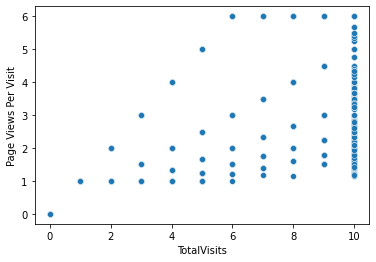

ScatterPlot Total Time Spent on Website Vs Converted


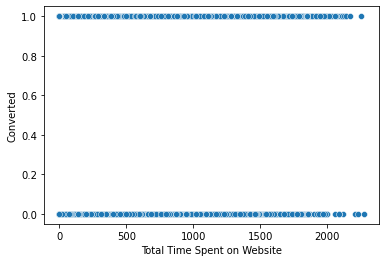

ScatterPlot Total Time Spent on Website Vs TotalVisits


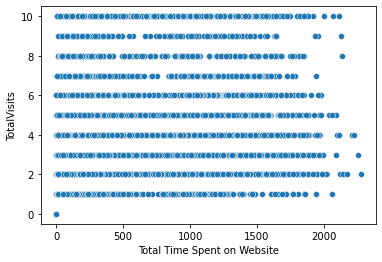

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


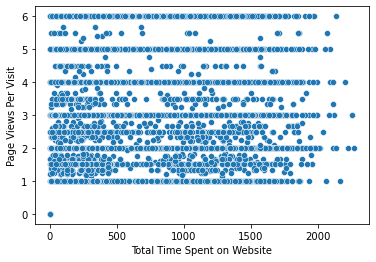

ScatterPlot Page Views Per Visit Vs Converted


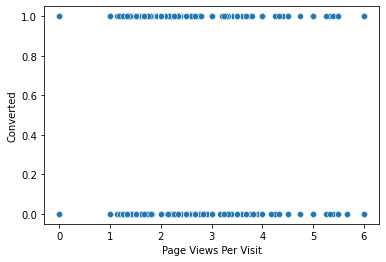

ScatterPlot Page Views Per Visit Vs TotalVisits


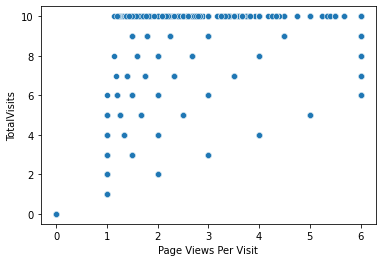

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


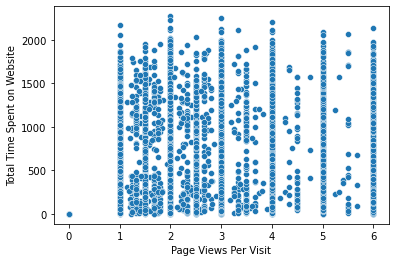

In [67]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(lead[i],lead[j])
            plt.show()

## Multivariate Analysis

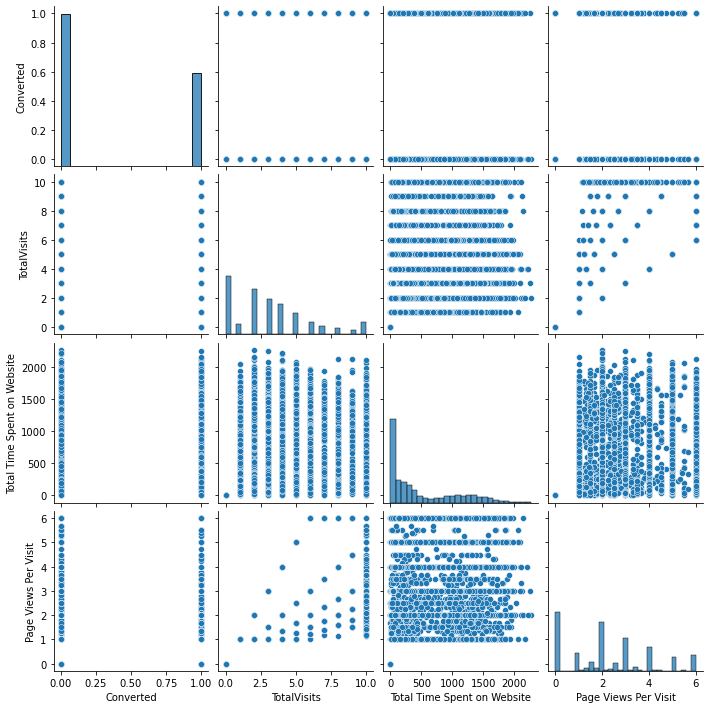

In [68]:
# Analysing pairplots of continuous variables
sns.pairplot(lead[cont_cols])

#### Observation:
* We can observe that outliers have been taken care of and now the data seems to be smooth, which is a good thing as now we    won't get distorted results.

## Step 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [69]:
# List of variables to map

var =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','Newspaper','Digital Advertisement',
        'Through Recommendations','A free copy of Mastering The Interview','X Education Forums']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[var] = lead[var].apply(binary_map)

In [70]:
lead.head(2)

Lead Origin     Lead Source  Do Not Email  Do Not Call  Converted  \
0         API      Olark Chat             0            0          0   
1         API  Organic Search             0            0          0   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   

             Last Activity Country      Specialization  \
0  Page Visited on Website   India  Finance Management   
1             Email Opened   India  Finance Management   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   

   Through Recommendations                         Tags    City  \
0                        0  Interested in other courses  Mumbai   
1                        0                      Ringing  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened

### Performing Feature Engineering

In [71]:
# Checking the variables' uniqueness
lead.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        11
Total Time Spent on Website                      1717
Page Views Per Visit                               91
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [72]:
lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [73]:
# Correcting the spelling error
lead['Lead Source']=lead['Lead Source'].replace('google', 'Google')

In [74]:
# Cross-checking the correction done
lead['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [75]:
#Saving the various categories in another variable
cat=lead['Lead Source'].unique()
cat

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [76]:
# As can be seen we just need 1st 8 categories therefore merging rest of the categories under 'others' category
lead['Lead Source']=lead['Lead Source'].replace(cat[7:],'Others')
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

In [77]:
lead['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [78]:
# Saving the categories under one variable
cat= lead['Last Activity'].unique()
cat

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [79]:
# Merging the less significant categories under 'others' categories
lead['Last Activity']=lead['Last Activity'].replace(cat[7:], 'Others')
lead['Last Activity'].value_counts()

Email Opened               3432
Others                     2933
Olark Chat Conversation     972
Page Visited on Website     640
Converted to Lead           428
Email Bounced               312
Email Link Clicked          267
Unreachable                  90
Name: Last Activity, dtype: int64

In [80]:
lead['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [81]:
cat=lead['Country'].unique()
cat

array(['India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [82]:
cat1=['Russia', 'Kuwait', 'Oman','Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia']

In [83]:
# Creating new category
lead['Country']=lead['Country'].replace(cat1, 'Outside India')

In [84]:
lead['Country'].value_counts()

India                   8787
Outside India            160
United States             69
United Arab Emirates      53
unknown                    5
Name: Country, dtype: int64

In [85]:
lead.nunique()

Lead Origin                                         4
Lead Source                                         8
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        11
Total Time Spent on Website                      1717
Page Views Per Visit                               91
Last Activity                                       8
Country                                             5
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [86]:
lead['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [87]:
cat=lead['Specialization'].unique()
cat

array(['Finance Management', 'Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [88]:
# Merging least significant data into a new category of 'others' 
lead['Specialization']=lead['Specialization'].replace(cat[-3:], 'Others')

In [89]:
lead['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Others                                286
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Services Excellence                    40
Name: Specialization, dtype: int64

In [90]:
lead['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [91]:
cat=lead['Tags'].unique()

In [92]:
# Creating a new category of 'others'
lead['Tags']=lead['Tags'].replace(cat[5:], 'Others')

In [93]:
lead['Tags'].value_counts()

Will revert after reading the email      5343
Others                                   1858
Ringing                                  1187
Interested in other courses               509
Lost to EINS                              172
In confusion whether part time or DLP       5
Name: Tags, dtype: int64

In [94]:
lead['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [95]:
cat=lead['Last Notable Activity'].unique()

In [96]:
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(cat[5:], 'Others')

In [97]:
lead['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
Others                     2433
Page Visited on Website     318
Email Link Clicked          173
Email Bounced                60
Name: Last Notable Activity, dtype: int64

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [98]:
cat=list(lead.columns[lead.dtypes=='object'])
cat

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [99]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(lead[cat], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [100]:
lead.shape

(9074, 81)

In [101]:
lead.head(2)

Lead Origin     Lead Source  Do Not Email  Do Not Call  Converted  \
0         API      Olark Chat             0            0          0   
1         API  Organic Search             0            0          0   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   

             Last Activity Country      Specialization  \
0  Page Visited on Website   India  Finance Management   
1             Email Opened   India  Finance Management   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   

   Through Recommendations                         Tags    City  \
0                        0  Interested in other courses  Mumbai   
1                        0                      Ringing  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   

   Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
0                           0                                      0   
1                           1                                      0   

   Last Activity_Others  Last Activity_Page Visited on Website  \
0                     0                                      1   
1                     0                                      0   

   Last Activity_Unreachable  Country_Outside India  \
0                          0                      0   
1                          0                      0   

   Country_United Arab Emirates  Country_United States  Country_unknown  \
0                             0                      0                0   
1                             0                      0                0   

   Specialization_Business Administration  Specialization_E-COMMERCE  \
0                                       0                          0   
1                                       0                          0   

   Specialization_Finance Management  Specialization_Hospitality Management  \
0                                  1                                      0   
1                                  1                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   

   Specializatio

In [102]:
# Dropping the original variables
lead=lead.drop(lead[cat],1)

In [103]:
# Checking the final shape of the dataset after dropping the original variables
lead.shape

(9074, 71)

In [104]:
# Checking the datatypes of the newly formed variables
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9074 non-null   int64  
 1   Do Not Call                                                              9074 non-null   int64  
 2   Converted                                                                9074 non-null   int64  
 3   TotalVisits                                                              9074 non-null   float64
 4   Total Time Spent on Website                                              9074 non-null   int64  
 5   Page Views Per Visit                                                     9074 non-null   float64
 6   Search                                                                  

#### Observation:
- As we can see that all the variables are numeric 
- No missing data we have
- No string value we have

## Step 5: Test-Train Split

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
# Putting the feature variables to X
X= lead.drop(['Converted'], axis=1)

In [107]:
# Checking the dimension of the feature variable
X.shape

(9074, 70)

In [108]:
X.head(2)

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   

   Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
0                           0                                      0   
1                           1                                      0   

   Last Activity_Others  Last Activity_Page Visited on Website  \
0                     0                                      1   
1                     0                                      0   

   Last Activity_Unreachable  Country_Outside India  \
0                          0                      0   
1                          0                      0   

   Country_United Arab Emirates  Country_United States  Country_unknown  \
0                             0                      0                0   
1                             0                      0                0   

   Specialization_Business Administration  Specialization_E-COMMERCE  \
0                                       0                          0   
1                                       0                          0   

   Specialization_Finance Management  Specialization_Hospitality Management  \
0                                  1                                      0   
1                                  1                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   

   Specialization_Others  Specialization_Retail Management  \
0                      0                                 0   
1                      

In [109]:
# Putiing the response variable to y
y=lead['Converted']

In [110]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [111]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6: Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
# Instantiating the Standardscaler
scaler= StandardScaler()

# fit_transform the numerical features
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [114]:
# Scaling TRAIN & TEST datasets
X_test_scaled=pd.DataFrame(X_test,columns=X_test.columns)

X_train_scaled=pd.DataFrame(X_train,columns=X_train.columns)
X_train_scaled.head()


Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
3009             -0.155018       0                  0                   0   
1012             -0.155018       0                  0                   0   
9226             -1.265540       0                  0                   0   
4750             -0.155018       0                  0                   0   
7987              0.122613       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
3009          0                      0                        0   
1012          0                      0                        0   
9226          0                      0                        0   
4750          0                      0                        0   
7987          0                      0                        0   

      A free copy of Mastering The Interview  \
3009                                       1   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
3009                        0                   0                       0   
1012                        0                   0                       0   
9226                        0                   0                       1   
4750                        0                   0                       0   
7987                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
3009                           0                   0                      0   
1012                           0                   0                      0   
9226                           0                   0                      0   
4750                           0                   0                      0   
7987                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3009                           0                             0   
1012                           0                             0   
9226                           0                             0   
4750                           0                             0   
7987                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3009                            0                                 0   
1012                            1                                 0   
9226                            0                                 0   
4750                            0                                 0   
7987                            0                                 0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
3009                           1                                      0   
1012                           0           

In [115]:
### Checking the Converted Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

37.85541106458012

#### Observation:
* We have ~38% converted rate

## Step 7: Looking at Correlations

In [116]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

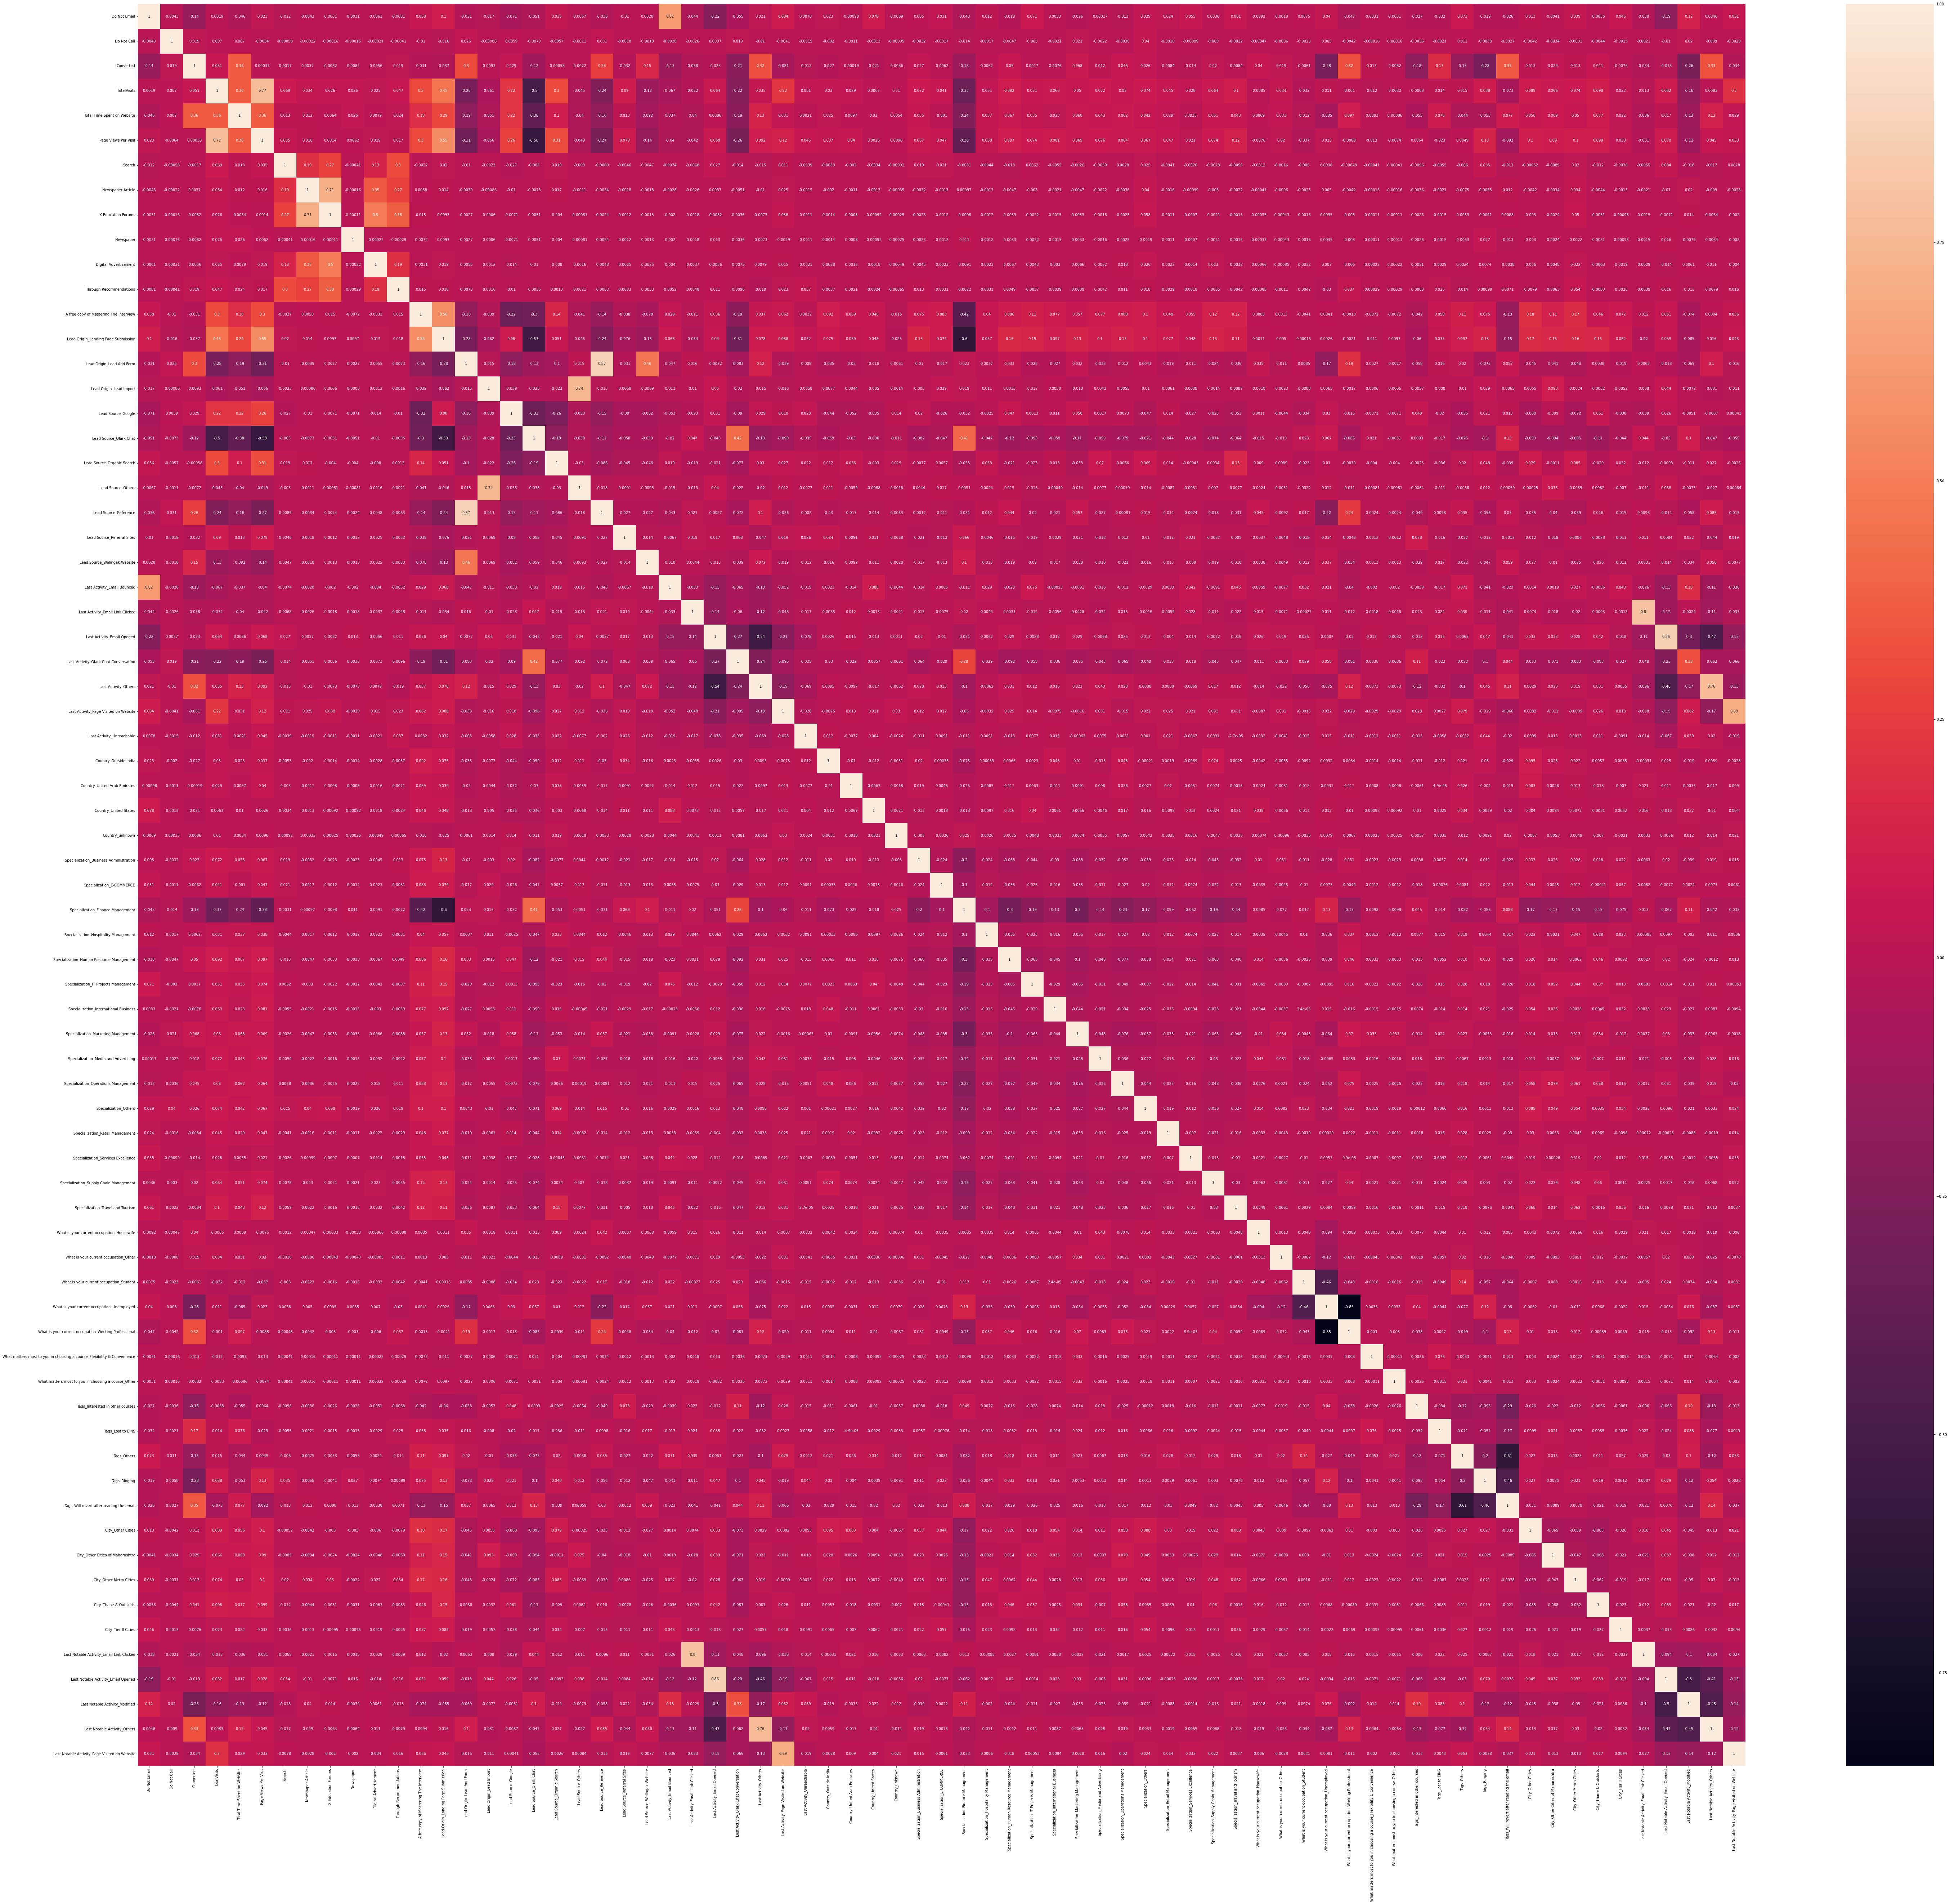

In [117]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,90))       
sns.heatmap(lead.corr(),annot = True)
plt.show()

#### Observation:
- As we can see we have large number of features, therefore, checking the correlation at this point doesn't seem to be a     good idea, therefore, directly jumping on to the Model building step using RFE

## Step 8: Feature Selection Using RFE

In [118]:
# Importing the required library
from sklearn.linear_model import LogisticRegression

# Instantiating the LogisticRegression
logreg= LogisticRegression()

In [119]:
# Importing thr library for using RFE
from sklearn.feature_selection import RFE

# Taken 15 variables for RFE to train the model
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train_scaled, y_train)

In [120]:
# The columns which are supported by RFE
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False])

In [121]:
# Saving the selectec feature in another variable
cols_to_keep=X_train_scaled.columns[rfe.support_]
cols_to_keep

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others'],
      dtype='object')

In [122]:
# Updating the test and train data with the columns to be used for RFE
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', False, 10),
 ('Lead Origin_Lead Add Form', False, 28),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Olark Chat', False, 29),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Welingak Website', False, 46),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('What is your current occupation_Housewife', False, 49),
 ('What is your current occupation_Working Professional', False, 25),
 ('Tags_Interested in other courses', False, 45),
 ('Tags_Lost to EINS', False, 34),
 ('Tags_Ringing', False, 4),
 ('Tags_Will revert after reading the email', True, 1),
 ('Last Notable Activity_Others', True, 1)]

## Step 9: Model Building

#### Assessing the model with StatsModels

In [124]:
import statsmodels.api as sm

### Logistic regression model

#### Defining few generic functions

In [125]:
# Defining a function for model building

def build_model(X, y):
    
    # For adding a constant
    X_sm = sm.add_constant(X)
    
    logm = sm.GLM(y,X_sm, family = sm.families.Binomial())
    
    # To fit the model
    res = logm.fit()
    
    # Summary of the model
    print(res.summary())
    
    return(res,  X_sm)

In [126]:
# Importing library for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
# Defining a function for calculating Variance Inflation Factor (VIF)

def check_VIF(d_f):
    # Dropping the constant
    X = d_f.drop('const',1) 
    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif= vif.sort_values(by = "VIF", ascending = False)
    return vif

### FIRST MODEL

In [128]:
res1, X_sm1 =build_model(X_train, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.5
Date:                Mon, 14 Nov 2022   Deviance:                       4035.0
Time:                        17:38:02   Pearson chi2:                 8.89e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Observation:
* `What is your current occupation_Housewife` has a very high P-value of 0.999 which is much higher than threshold of 0.05, hence, it is an insignificant feature therefore, can be dropped.

### SECOND MODEL

In [129]:
cols2= cols_to_keep.drop('What is your current occupation_Housewife',1)

In [130]:
res2, X_sm2 =build_model(X_train[cols2], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.8
Date:                Mon, 14 Nov 2022   Deviance:                       4043.5
Time:                        17:38:02   Pearson chi2:                 8.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Observation:
- `Lead Origin_Lead Add Form` feature has P-value > 0.05, therefore, dropping it

### THIRD MODEL

In [131]:
cols3= cols2.drop('Lead Origin_Lead Add Form', 1)

In [132]:
res3, X_sm3= build_model(X_train[cols3], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.5
Date:                Mon, 14 Nov 2022   Deviance:                       4047.1
Time:                        17:38:02   Pearson chi2:                 8.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Observation:
- All the features have P-values as zero,hence, they all seem to be significant.
- So, this is the final train model we have
- We also have to check the VIFs of these features so as to check whether or not any multicollinearity exixts.

In [133]:
check_VIF(X_sm3)

Features   VIF
11              Tags_Will revert after reading the email  1.81
3                                 Lead Source_Olark Chat  1.79
12                          Last Notable Activity_Others  1.48
6                  Last Activity_Olark Chat Conversation  1.38
1                            Total Time Spent on Website  1.36
4                                  Lead Source_Reference  1.23
7   What is your current occupation_Working Professional  1.20
10                                          Tags_Ringing  1.10
0                                           Do Not Email  1.06
5                           Lead Source_Welingak Website  1.06
8                       Tags_Interested in other courses  1.05
9                                      Tags_Lost to EINS  1.02
2                                Lead Origin_Lead Import  1.01

#### Observation:
* All the features have VIFs < 5, which, clearly states that there doesn't exist any multicollinearity

<AxesSubplot:>

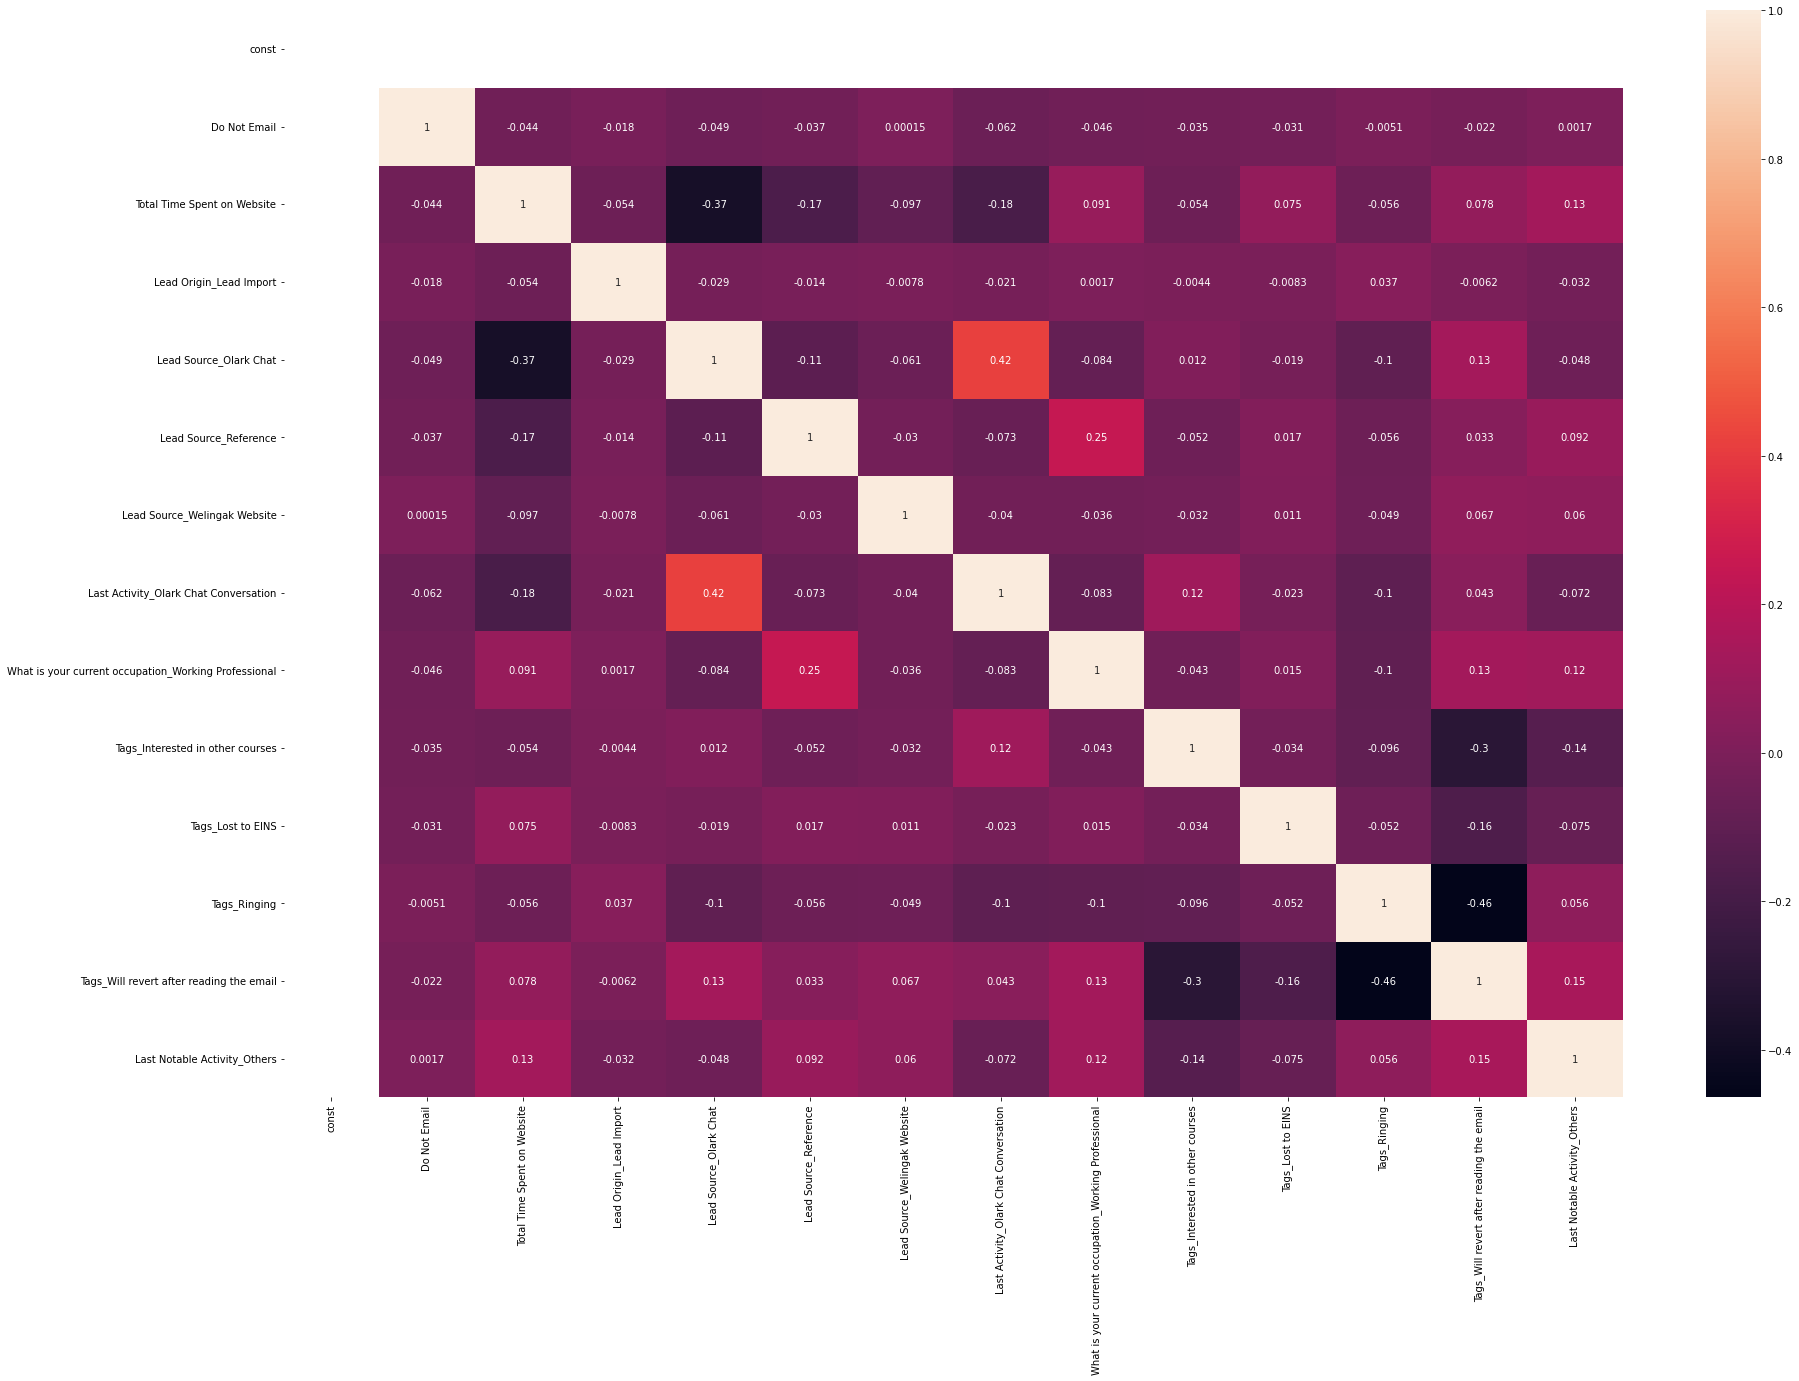

In [134]:
# Now checking the correlation once
plt.figure(figsize = (30,20))
sns.heatmap(X_sm3.corr(), annot=True)

In [135]:
# Finding the predicted values on train set
y_train_pred = res3.predict(X_sm3)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.280990     3009          0
1          0        0.337471     1012          0
2          0        0.002884     9226          0
3          1        0.961742     4750          1
4          1        0.997870     7987          1

In [136]:
from sklearn import metrics

In [137]:
# Function to get confusion matrix and accuracy
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Confusion Matrix:")
print(confusion)
print("Accuracy: ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Confusion Matrix:
[[3600  305]
 [ 484 1962]]
Accuracy:  0.8757675956542277


In [138]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

#### Observation:
* So our above final model has following features:
   - P-values for all the features is close to zero
   - VIFs of all the features is well within the threshold of 5
   - The training accuracy is ~88% at a probability threshold of 0.5

## Metrics beyond simply accuracy

In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Calculating various other parameters
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("False postive rate i.e. predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
print("Positive predictive value: ", TP / float(TP+FP))
print("Negative predictive value: ", TN / float(TN+FN))

Sensitivity:  0.8021259198691741
Specificity:  0.9218950064020487
False postive rate i.e. predicting the lead conversion when the lead does not convert:  0.07810499359795134
Positive predictive value:  0.8654609616232907
Negative predictive value:  0.881488736532811


## Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease   in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
# Defininig 
def create_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

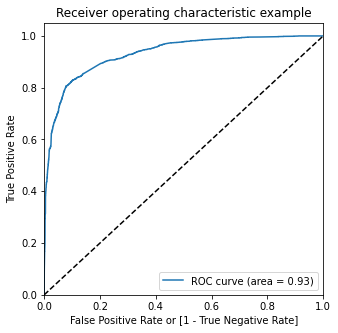

In [143]:
# Creating the ROC Curve
create_roc( y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [144]:
# Calculating the area under the curve
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9317813818165066


#### Observation:
Area Under the Curve (AUC) is 93%, which is a good thing as it is closer to the ideal value of 1


## Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [145]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.280990     3009          0    1    1    1    0    0   
1          0        0.337471     1012          0    1    1    1    1    0   
2          0        0.002884     9226          0    1    0    0    0    0   
3          1        0.961742     4750          1    1    1    1    1    1   
4          1        0.997870     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    1    1    1    1    1

In [146]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.726500  0.966885  0.575928
0.2   0.2  0.779090  0.929272  0.685019
0.3   0.3  0.857188  0.854865  0.858643
0.4   0.4  0.870729  0.829518  0.896543
0.5   0.5  0.875768  0.802126  0.921895
0.6   0.6  0.867422  0.755928  0.937260
0.7   0.7  0.851834  0.680294  0.959283
0.8   0.8  0.818611  0.558054  0.981818
0.9   0.9  0.780979  0.447261  0.990013


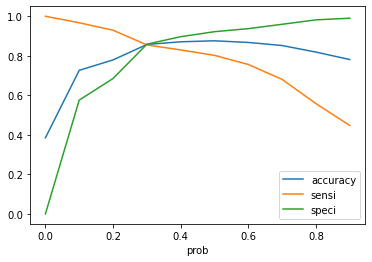

In [147]:
# Plotted accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Observation:
##### From the curve above, 0.37 is the optimum point to take as a cutoff probability

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.280990     3009          0    1    1    1    0    0   
1          0        0.337471     1012          0    1    1    1    1    0   
2          0        0.002884     9226          0    1    0    0    0    0   
3          1        0.961742     4750          1    1    1    1    1    1   
4          1        0.997870     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    1                1  
4    1    1    1    1    1                1

In [149]:
# Let's check the overall accuracy
accuracy_score= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion1)
print("Accuracy Score: " , accuracy_score)

[[3465  440]
 [ 405 2041]]
Accuracy Score:  0.8669500866005353


In [150]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [151]:
# Calculating other metrices
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
print("Positive predictive value: ", TP / float(TP+FP))
print("Negative predictive value: ", TN / float(TN+FN))

Sensitivity:  0.8344235486508585
Specificity:  0.8873239436619719
False postive rate - predicting the lead conversion when the lead does not convert:  0.11267605633802817
Positive predictive value:  0.822652156388553
Negative predictive value:  0.8953488372093024


### Plotting Graph for Confusion Matrix

In [152]:
y_pred=res3.predict(X_sm3)

In [153]:
# Creating the dataframe
train=pd.DataFrame(y_pred,columns=["Converted_prob"])
train["Actual"]=y_train
train["Converted_Class"]=np.where(train["Converted_prob"]>0.37,1,0)
train=train.dropna()

In [154]:
train.head()

Converted_prob  Actual  Converted_Class
3009        0.280990       0                0
1012        0.337471       0                0
9226        0.002884       0                0
4750        0.961742       1                1
7987        0.997870       1                1

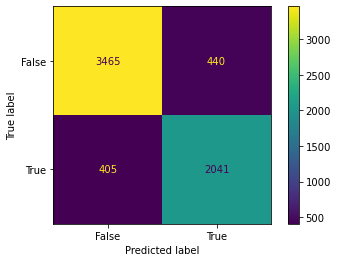

In [155]:
# Plotting Confusion matrix
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(train["Actual"],train["Converted_Class"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Using sklearn utilities for the same

In [156]:
from sklearn.metrics import precision_score, recall_score

In [157]:
# Calculating Accuracy, Recall and Precision
print("Accuracy =", metrics.accuracy_score(train["Actual"], train["Converted_Class"]))
print("Recall =", metrics.recall_score(train["Actual"], train["Converted_Class"]))
print("Precision =", metrics.precision_score(train["Actual"], train["Converted_Class"]))

Accuracy = 0.8669500866005353
Recall = 0.8344235486508585
Precision = 0.822652156388553


### Creating Classification Report

In [158]:
# Automatic calculation of the important metrices
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3905
           1       0.82      0.83      0.83      2446

    accuracy                           0.87      6351
   macro avg       0.86      0.86      0.86      6351
weighted avg       0.87      0.87      0.87      6351



### Precision and recall tradeoff

In [159]:
from sklearn.metrics import precision_recall_curve

In [160]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

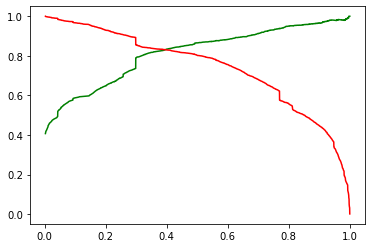

In [162]:
# Plotting thr Recall vs Precision graphs for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Observation:
From the above curves it can be observed that the ~0.4 is the optimum cutoff probability using PRECISION - RECALL CURVES

In [163]:
# Checking the predictions using the above threshold
y_train_pred_final['final_predicted_prob'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.280990     3009          0    1    1    1    0    0   
1          0        0.337471     1012          0    1    1    1    1    0   
2          0        0.002884     9226          0    1    0    0    0    0   
3          1        0.961742     4750          1    1    1    1    1    1   
4          1        0.997870     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  final_predicted_prob  
0    0    0    0    0    0                0                     0  
1    0    0    0    0    0                0                     0  
2    0    0    0    0    0                0                     0  
3    1    1    1    1    1                1                     1  
4    1    1    1    1    1                1                     1

In [164]:
# Creating the overall accuracy and confusion matrix for threshold of 0.4
Accuracy_score= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion2)
print('Accuracy Score: ', Accuracy_score)

[[3465  440]
 [ 405 2041]]
Accuracy Score:  0.8669500866005353


In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Calculating other metrices
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
print("Positive predictive value: ", TP / float(TP+FP))
print("Negative predictive value: ", TN / float(TN+FN))

Sensitivity:  0.8344235486508585
Specificity:  0.8873239436619719
False postive rate - predicting the lead conversion when the lead does not convert:  0.11267605633802817
Positive predictive value:  0.822652156388553
Negative predictive value:  0.8953488372093024


In [167]:
print("Accuracy =", metrics.accuracy_score(train["Actual"], train["Converted_Class"]))
print("Recall =", metrics.recall_score(train["Actual"], train["Converted_Class"]))
print("Precision =", metrics.precision_score(train["Actual"], train["Converted_Class"]))

Accuracy = 0.8669500866005353
Recall = 0.8344235486508585
Precision = 0.822652156388553


#### Observation:
* The values are at 0.4 threshold are almost similar to what we have got at threshold of 0.37, therefore, we will stick to   0.37 threshold

### Step 11: Making predictions on the test set

In [168]:
# Storing the final features
X_test=X_test[cols3]

In [169]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [170]:
# Making predictions on test dataset
y_test_pred = res3.predict(X_test_sm)

In [171]:
y_test_pred[:10]

3271    0.189591
1490    0.985120
7936    0.163814
4216    0.811308
3830    0.191901
1800    0.754081
6507    0.011675
4821    0.146421
4223    0.992991
4714    0.297913
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

0
3271  0.189591
1490  0.985120
7936  0.163814
4216  0.811308
3830  0.191901

In [173]:
# y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
3271          0
1490          1
7936          0
4216          1
3830          0

In [174]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [175]:
# To drop indexes for both dataframes
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [176]:
# Concatenating y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [177]:
y_test_pred_final.head()

Converted  Lead ID         0
0          0     3271  0.189591
1          1     1490  0.985120
2          0     7936  0.163814
3          1     4216  0.811308
4          0     3830  0.191901

In [178]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_test_pred_final.head()

Converted  Lead ID  Converted_prob
0          0     3271        0.189591
1          1     1490        0.985120
2          0     7936        0.163814
3          1     4216        0.811308
4          0     3830        0.191901

In [179]:
# Putting the threshold of 0.37 as derived
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

y_test_pred_final.head()

Converted  Lead ID  Converted_prob  final_predicted
0          0     3271        0.189591                0
1          1     1490        0.985120                1
2          0     7936        0.163814                0
3          1     4216        0.811308                1
4          0     3830        0.191901                0

In [180]:
# Printing the AREA UNDER THE CURVE
print("Area under curve: ", metrics.roc_auc_score(y_test_pred_final.Converted, y_test_pred_final.Converted_prob))

Area under curve:  0.9216485142799163


In [181]:
Accuracy_score=metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
print(confusion)
print('Accuracy score: ', Accuracy_score)

[[1538  196]
 [ 168  821]]
Accuracy score:  0.8663239074550129


### Plotting Confision Matrix for TEST Dataset

In [182]:
y_pred=res3.predict(X_test_sm)
y_pred.head()

3271    0.189591
1490    0.985120
7936    0.163814
4216    0.811308
3830    0.191901
dtype: float64

In [183]:
test=pd.DataFrame(y_pred,columns=["Converted_prob"])
test["Actual"]=y_test
test["Converted_Class"]=np.where(test["Converted_prob"]>0.37,1,0)
test=test.dropna()

In [184]:
test.head()

Converted_prob  Actual  Converted_Class
3271        0.189591       0                0
1490        0.985120       1                1
7936        0.163814       0                0
4216        0.811308       1                1
3830        0.191901       0                0

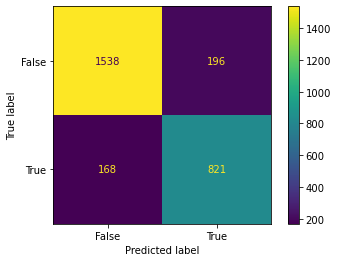

In [185]:
# Making a plot for confusion matrix
confusion_matrix=metrics.confusion_matrix(test["Actual"],test["Converted_Class"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [186]:
# Calculating other metrices
TP = confusion[1,1]    # True positives 
TN = confusion[0,0]    # True negatives
FP = confusion[0,1]    # False positives
FN = confusion[1,0]    # False negatives
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("False postive rate i.e predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
print("Positive predictive value: ", TP / float(TP+FP))
print("Negative predictive value: ", TN / float(TN+FN))

Sensitivity:  0.8301314459049545
Specificity:  0.8869665513264129
False postive rate i.e predicting the lead conversion when the lead does not convert:  0.11303344867358708
Positive predictive value:  0.8072763028515241
Negative predictive value:  0.9015240328253223


In [187]:
# Calculating Accuracy, Recall and Precision for test
print("Accuracy =", metrics.accuracy_score(test["Actual"], test["Converted_Class"]))
print("Recall =", metrics.recall_score(test["Actual"], test["Converted_Class"]))
print("Precision =", metrics.precision_score(test["Actual"], test["Converted_Class"]))

Accuracy = 0.8663239074550129
Recall = 0.8301314459049545
Precision = 0.8072763028515241


### Classification Report

In [188]:
# Finding out the classification report
print(classification_report(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1734
           1       0.81      0.83      0.82       989

    accuracy                           0.87      2723
   macro avg       0.85      0.86      0.86      2723
weighted avg       0.87      0.87      0.87      2723



### Assigning Lead Score
##### Lead Score = 100 * ConversionProbability
This needs to be calculated for all the leads from the original dataset (train + test).

In [189]:
# Selecting test dataset
lead_test_pred = y_test_pred_final.copy()
lead_test_pred.head()

Converted  Lead ID  Converted_prob  final_predicted
0          0     3271        0.189591                0
1          1     1490        0.985120                1
2          0     7936        0.163814                0
3          1     4216        0.811308                1
4          0     3830        0.191901                0

In [190]:
# Selecting train dataset
lead_train_pred = y_train_pred_final.copy()
lead_train_pred.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.280990     3009          0    1    1    1    0    0   
1          0        0.337471     1012          0    1    1    1    1    0   
2          0        0.002884     9226          0    1    0    0    0    0   
3          1        0.961742     4750          1    1    1    1    1    1   
4          1        0.997870     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  final_predicted_prob  
0    0    0    0    0    0                0                     0  
1    0    0    0    0    0                0                     0  
2    0    0    0    0    0                0                     0  
3    1    1    1    1    1                1                     1  
4    1    1    1    1    1                1                     1

In [191]:
# Making both the datasets with equal features, hence, dropping extra features from train dataset
lead_train_pred=lead_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
lead_train_pred.head()

Lead ID  Converted  Converted_prob  final_predicted
0     3009          0        0.280990                0
1     1012          0        0.337471                0
2     9226          0        0.002884                0
3     4750          1        0.961742                1
4     7987          1        0.997870                1

In [192]:
# Appending both datasets
lead_pred = lead_train_pred.append(lead_test_pred)
lead_pred.head()

Lead ID  Converted  Converted_prob  final_predicted
0     3009          0        0.280990                0
1     1012          0        0.337471                0
2     9226          0        0.002884                0
3     4750          1        0.961742                1
4     7987          1        0.997870                1

In [193]:
# Inspecting the shapes of all the 3 datasets
# Shape of train dataset
lead_train_pred.shape

(6351, 4)

In [194]:
# Shape of test dataset
lead_test_pred.shape

(2723, 4)

In [195]:
# Shape of final lead dataset
lead_pred.shape

(9074, 4)

In [196]:
# Checking for any duplicate of Lead ID
lead_pred['Lead ID'].nunique() 

9074

In [197]:
# Finally, calculating the Lead Score
lead_pred['Lead_Score'] = lead_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_pred.head()

Lead ID  Converted  Converted_prob  final_predicted  Lead_Score
0     3009          0        0.280990                0          28
1     1012          0        0.337471                0          34
2     9226          0        0.002884                0           0
3     4750          1        0.961742                1          96
4     7987          1        0.997870                1         100

In [198]:
# Converting Lead ID column as an index
lead_pred = lead_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_pred.head()

Converted  Converted_prob  final_predicted  Lead_Score
Lead ID                                                        
0                0        0.014831                0           1
1                0        0.004794                0           0
2                1        0.815635                1          82
3                0        0.002184                0           0
4                1        0.779834                1          78

In [199]:
# To get Lead Number column from original data
lead_num=pd.DataFrame(lead_num)
lead_num.head()

Lead Number
0       660737
1       660728
2       660727
3       660719
4       660681

In [200]:
# Concatenating the lead_num dataframe with lead_pred dataframe based on index
lead_scored = pd.concat([lead_num, lead_pred], axis=1)
lead_scored.head()

Lead Number  Converted  Converted_prob  final_predicted  Lead_Score
0       660737        0.0        0.014831              0.0         1.0
1       660728        0.0        0.004794              0.0         0.0
2       660727        1.0        0.815635              1.0        82.0
3       660719        0.0        0.002184              0.0         0.0
4       660681        1.0        0.779834              1.0        78.0

#### Observation:
* We have a final dataset with `Lead Number` and `Lead_Score`.
* This will give an edge to the company for connecting to the 'Hot Leads' which will definitely `increase` the business       gain `from 30% to more than 80%`.

## Determining Importance of features 

In [201]:
# Displaying features from the final model alongwith their coefficients
pd.options.display.float_format = '{:.2f}'.format
params = res3.params[1:]
params

Do Not Email                                           -2.04
Total Time Spent on Website                             1.17
Lead Origin_Lead Import                                 2.03
Lead Source_Olark Chat                                  0.93
Lead Source_Reference                                   4.68
Lead Source_Welingak Website                            5.74
Last Activity_Olark Chat Conversation                  -2.27
What is your current occupation_Working Professional    2.75
Tags_Interested in other courses                       -1.91
Tags_Lost to EINS                                       5.98
Tags_Ringing                                           -3.56
Tags_Will revert after reading the email                1.43
Last Notable Activity_Others                            2.06
dtype: float64

In [202]:
# Relative importance of features
feat_imp = params
feature_importance = 100.0 * (feat_imp / feat_imp.max())
feature_importance

Do Not Email                                           -34.07
Total Time Spent on Website                             19.47
Lead Origin_Lead Import                                 33.96
Lead Source_Olark Chat                                  15.56
Lead Source_Reference                                   78.20
Lead Source_Welingak Website                            95.98
Last Activity_Olark Chat Conversation                  -37.90
What is your current occupation_Working Professional    45.90
Tags_Interested in other courses                       -31.85
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -59.42
Tags_Will revert after reading the email                23.94
Last Notable Activity_Others                            34.46
dtype: float64

In [203]:
# Ranking the features on the basis of their importance
ranked_feature = np.argsort(feature_importance,kind='quicksort',order='list of str')
ranked_feature

Do Not Email                                            10
Total Time Spent on Website                              6
Lead Origin_Lead Import                                  0
Lead Source_Olark Chat                                   8
Lead Source_Reference                                    3
Lead Source_Welingak Website                             1
Last Activity_Olark Chat Conversation                   11
What is your current occupation_Working Professional     2
Tags_Interested in other courses                        12
Tags_Lost to EINS                                        7
Tags_Ringing                                             4
Tags_Will revert after reading the email                 5
Last Notable Activity_Others                             9
dtype: int64

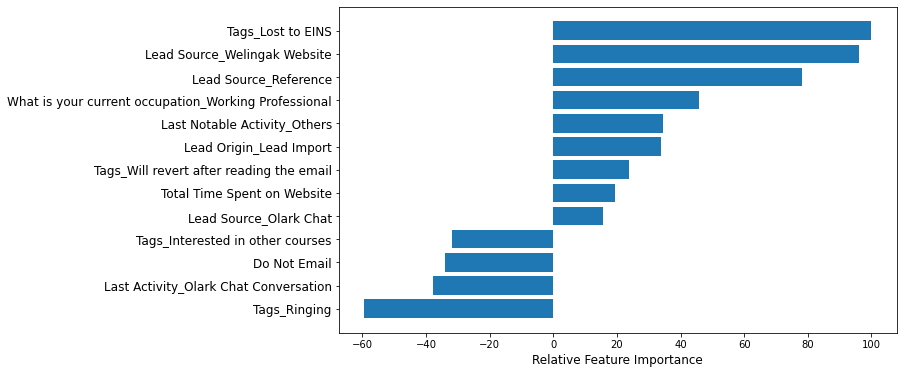

In [204]:
# Plotting features on the basis of their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(ranked_feature.shape[0])
ax.barh(pos, feature_importance[ranked_feature])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols3].columns)[ranked_feature], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

## Conclusion

Following are the conclusions from the final model we have made:
* The P-values of all the features in the final model is zero, which shows high significance of features present.
* The VIFs of all the features of the final model is well below the threshold of 5 , which is a good thing as it shows no     multi collinearity is present between the features.
* Accuracy of the final model is 92%, which is quiet decent.
* The values we got at 0.5 threshold were decent but we got better metrics at a threshold of 0.37. which is again a better   value, but it is subject and can be increased or decreased as per the business needs.
* The final model has 13 features.

## TRAIN Vs TEST DATASET
### TRAIN DATASET (Threshold = 0.37)
* Accuracy = 0.8669500866005353
* Recall = 0.8344235486508585
* Precision = 0.822652156388553
* AUC = 93%

### TEST DATASET
* Accuracy = 0.8663239074550129
* Recall = 0.8301314459049545
* Precision = 0.8072763028515241
* AUC=92%


### Top 13 features of the final model are:
* Do Not Email                                            
* Total Time Spent on Website                              
* Lead Origin_Lead Import                                  
* Lead Source_Olark Chat                                   
* Lead Source_Reference                                    
* Lead Source_Welingak Website                             
* Last Activity_Olark Chat Conversation                   
* What is your current occupation_Working Professional     
* Tags_Interested in other courses                        
* Tags_Lost to EINS                                       
* Tags_Ringing                                             
* Tags_Will revert after reading the email                
* Last Notable Activity_Others                             


### Features with Negative Coefficient:
- Do Not Email 
- Last Activity_Olark Chat Conversation
- Tags_Interested in other courses 
- Tags_Ringing 

### Features with Positive Coefficient:
- Total Time Spent on Website                             
- Lead Origin_Lead Import                                 
- Lead Source_Olark Chat                                 
- Lead Source_Reference                                   
- Lead Source_Welingak Website                            
- What is your current occupation_Working Professional    
- Tags_Lost to EINS                                      
- Tags_Will revert after reading the email                
- Last Notable Activity_Others      